In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.colors as mcolors
import random
import math
import time
from sklearn.metrics import mean_squared_error,mean_absolute_error
import datetime
import operator
plt.style.use('fivethirtyeight')
%matplotlib inline

In [2]:
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import SVR

In [3]:
confirmed_cases = pd.read_csv('confirmed_cases.csv')

In [4]:
confirmed_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/21/20  9/22/20  9/23/20  \
0        0        0        0        0  ...    39074    39096    39145   
1        0        0        0        0  ...    12535    12666    12787   
2        0        0        0        0  ...    50023    50214    50400   
3        0        0        0        0  ...     1681     1681     1753   
4        0        0        0        0  ...     4117     4236     4363   

   9/24/20  9/25/20  9/26/20  9/27/20  9/28/20  9/29/20  9/30/20  
0    39170    39186    39192    39227    39233    39254    39268  
1    12921    13045    13153    13259    13391    13518    13649  
2    50579    50754    50914    51067    51213    51368    51530  
3     1753     1836     1836     1836     1966     1966     2050  
4     4475     4590     4672     4718     4797     4905     4972  

[5 rows x 257 columns]

In [5]:
deaths_reported= pd.read_csv('deaths_cases.csv')

In [6]:
deaths_reported.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/21/20  9/22/20  9/23/20  \
0        0        0        0        0  ...     1444     1445     1446   
1        0        0        0        0  ...      364      367      370   
2        0        0        0        0  ...     1679     1689     1698   
3        0        0        0        0  ...       53       53       53   
4        0        0        0        0  ...      154      155      159   

   9/24/20  9/25/20  9/26/20  9/27/20  9/28/20  9/29/20  9/30/20  
0     1451     1451     1453     1453     1455     1458     1458  
1      370      373      375      377      380      384      387  
2     1703     1707     1711     1714     1719     1726     1736  
3       53       53       53       53       53       53       53  
4      162      167      171      174      176      179      183  

[5 rows x 257 columns]

In [7]:
recoveries_cases = pd.read_csv('recovered_cases.csv')

In [8]:
recoveries_cases.head()

Province/State Country/Region       Lat       Long  1/22/20  1/23/20  \
0            NaN    Afghanistan  33.93911  67.709953        0        0   
1            NaN        Albania  41.15330  20.168300        0        0   
2            NaN        Algeria  28.03390   1.659600        0        0   
3            NaN        Andorra  42.50630   1.521800        0        0   
4            NaN         Angola -11.20270  17.873900        0        0   

   1/24/20  1/25/20  1/26/20  1/27/20  ...  9/21/20  9/22/20  9/23/20  \
0        0        0        0        0  ...    32576    32576    32610   
1        0        0        0        0  ...     6995     7042     7139   
2        0        0        0        0  ...    35180    35307    35428   
3        0        0        0        0  ...     1199     1199     1203   
4        0        0        0        0  ...     1449     1462     1473   

   9/24/20  9/25/20  9/26/20  9/27/20  9/28/20  9/29/20  9/30/20  
0    32619    32619    32635    32642    32642    32746    32789  
1     7239     7309     7397     7397     7629     7732     7847  
2    35544    35654    35756    35860    35962    36063    36174  
3     1203     1263     1263     1263     1265     1265     1432  
4     1503     1554     1639     1707     1813     1833     1941  

[5 rows x 257 columns]

In [9]:
latest_data = pd.read_csv('latest_cases.csv')

In [10]:
latest_data.tail(200)

Province_State      Country_Region          Last_Update        Lat  \
3755  West Virginia                  US  2020-10-02 05:23:31  38.843154   
3756  West Virginia                  US  2020-10-02 05:23:31  38.462311   
3757  West Virginia                  US  2020-10-02 05:23:31  39.270572   
3758  West Virginia                  US  2020-10-02 05:23:31  38.029749   
3759  West Virginia                  US  2020-10-02 05:23:31  38.925128   
...             ...                 ...                  ...        ...   
3950            NaN  West Bank and Gaza  2020-10-02 05:23:31  31.952200   
3951            NaN      Western Sahara  2020-10-02 05:23:31  24.215500   
3952            NaN               Yemen  2020-10-02 05:23:31  15.552727   
3953            NaN              Zambia  2020-10-02 05:23:31 -13.133897   
3954            NaN            Zimbabwe  2020-10-02 05:23:31 -19.015438   

          Long_  Confirmed  Deaths  Recovered  Active     Admin2     FIPS  \
3755 -81.119349         25       0          0    25.0    Calhoun  54013.0   
3756 -81.076522         37       2          0    35.0       Clay  54015.0   
3757 -80.706715         28       1          0    27.0  Doddridge  54017.0   
3758 -81.082866        634      14          0   620.0    Fayette  54019.0   
3759 -80.859527         48       0          0    48.0     Gilmer  54021.0   
...         ...        ...     ...        ...     ...        ...      ...   
3950  35.233200      40322     318      32577  7427.0        NaN      NaN   
3951 -12.885800         10       1          8     1.0        NaN      NaN   
3952  48.516388       2039     587       1297   155.0        NaN      NaN   
3953  27.849332      14802     333      13961   508.0        NaN      NaN   
3954  29.154857       7850     228       6312  1310.0        NaN      NaN   

                      Combined_Key  Incident_Rate  People_Tested  \
3755    Calhoun, West Virginia, US     351.666901            NaN   
3756       Clay, West Virginia, US     434.884814            NaN   
3757  Doddridge, West Virginia, US     331.439394            NaN   
3758    Fayette, West Virginia, US    1495.071452            NaN   
3759     Gilmer, West Virginia, US     613.575355            NaN   
...                            ...            ...            ...   
3950            West Bank and Gaza     790.407997            NaN   
3951                Western Sahara       1.674116            NaN   
3952                         Yemen       6.836325            NaN   
3953                        Zambia      80.515859            NaN   
3954                      Zimbabwe      52.815976            NaN   

      People_Hospitalized       UID ISO3  
3755                  NaN  84054013  USA  
3756                  NaN  84054015  USA  
3757                  NaN  84054017  USA  
3758                  NaN  84054019  USA  
3759                  NaN  84054021  USA  
...                   ...       ...  ...  
3950                  NaN       275  PSE  
3951                  NaN       732  ESH  
3952                  NaN       887  YEM  
3953                  NaN       894  ZMB  
3954                  NaN       716  ZWE  

[200 rows x 17 columns]

In [11]:
#Fetching all the columns from the confirmed dataset
colsc = confirmed_cases.keys()
colsd = deaths_reported.keys()
colsr = recoveries_cases.keys()

In [12]:
#Extracting the date columns
confirmed = confirmed_cases.loc[:,colsc[4]:colsc[-1]]
deaths = deaths_reported.loc[:,colsd[4]:colsd[-1]]
recoveries = recoveries_cases.loc[:,colsr[4]:colsr[-1]]

In [13]:
confirmed

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
261        0        0        0        0        0        0        0        0   
262        0        0        0        0        0        0        0        0   
263        0        0        0        0        0        0        0        0   
264        0        0        0        0        0        0        0        0   
265        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  9/21/20  9/22/20  9/23/20  9/24/20  9/25/20  \
0          0        0  ...    39074    39096    39145    39170    39186   
1          0        0  ...    12535    12666    12787    12921    13045   
2          0        0  ...    50023    50214    50400    50579    50754   
3          0        0  ...     1681     1681     1753     1753     1836   
4          0        0  ...     4117     4236     4363     4475     4590   
..       ...      ...  ...      ...      ...      ...      ...      ...   
261        0        0  ...    36151    36580    37083    37591    37963   
262        0        0  ...       10       10       10       10       10   
263        0        0  ...     2028     2028     2029     2029     2029   
264        0        0  ...    14175    14389    14443    14491    14515   
265        0        0  ...     7683     7711     7725     7752     7787   

     9/26/20  9/27/20  9/28/20  9/29/20  9/30/20  
0      39192    39227    39233    39254    39268  
1      13153    13259    13391    13518    13649  
2      50914    51067    51213    51368    51530  
3       1836     1836     1966     1966     2050  
4       4672     4718     4797     4905     4972  
..       ...      ...      ...      ...      ...  
261    38253    38703    39121    39541    39899  
262       10       10       10       10       10  
263     2030     2030     2031     2031     2034  
264    14612    14641    14660    14715    14759  
265     7803     7812     7816     7837     7838  

[266 rows x 253 columns]

In [14]:
deaths

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
261        0        0        0        0        0        0        0        0   
262        0        0        0        0        0        0        0        0   
263        0        0        0        0        0        0        0        0   
264        0        0        0        0        0        0        0        0   
265        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  9/21/20  9/22/20  9/23/20  9/24/20  9/25/20  \
0          0        0  ...     1444     1445     1446     1451     1451   
1          0        0  ...      364      367      370      370      373   
2          0        0  ...     1679     1689     1698     1703     1707   
3          0        0  ...       53       53       53       53       53   
4          0        0  ...      154      155      159      162      167   
..       ...      ...  ...      ...      ...      ...      ...      ...   
261        0        0  ...      265      269      272      274      278   
262        0        0  ...        1        1        1        1        1   
263        0        0  ...      586      586      586      586      587   
264        0        0  ...      331      331      332      332      332   
265        0        0  ...      225      226      227      227      227   

     9/26/20  9/27/20  9/28/20  9/29/20  9/30/20  
0       1453     1453     1455     1458     1458  
1        375      377      380      384      387  
2       1711     1714     1719     1726     1736  
3         53       53       53       53       53  
4        171      174      176      179      183  
..       ...      ...      ...      ...      ...  
261      285      291      299      306      311  
262        1        1        1        1        1  
263      587      587      587      587      587  
264      332      332      332      332      332  
265      227      227      228      228      228  

[266 rows x 253 columns]

In [15]:
recoveries

1/22/20  1/23/20  1/24/20  1/25/20  1/26/20  1/27/20  1/28/20  1/29/20  \
0          0        0        0        0        0        0        0        0   
1          0        0        0        0        0        0        0        0   
2          0        0        0        0        0        0        0        0   
3          0        0        0        0        0        0        0        0   
4          0        0        0        0        0        0        0        0   
..       ...      ...      ...      ...      ...      ...      ...      ...   
248        0        0        0        0        0        0        0        0   
249        0        0        0        0        0        0        0        0   
250        0        0        0        0        0        0        0        0   
251        0        0        0        0        0        0        0        0   
252        0        0        0        0        0        0        0        0   

     1/30/20  1/31/20  ...  9/21/20  9/22/20  9/23/20  9/24/20  9/25/20  \
0          0        0  ...    32576    32576    32610    32619    32619   
1          0        0  ...     6995     7042     7139     7239     7309   
2          0        0  ...    35180    35307    35428    35544    35654   
3          0        0  ...     1199     1199     1203     1203     1263   
4          0        0  ...     1449     1462     1473     1503     1554   
..       ...      ...  ...      ...      ...      ...      ...      ...   
248        0        0  ...    24428    25469    26288    26934    27183   
249        0        0  ...        8        8        8        8        8   
250        0        0  ...     1235     1240     1245     1250     1255   
251        0        0  ...    13629    13629    13629    13643    13643   
252        0        0  ...     5924     5979     6007     6043     6057   

     9/26/20  9/27/20  9/28/20  9/29/20  9/30/20  
0      32635    32642    32642    32746    32789  
1       7397     7397     7629     7732     7847  
2      35756    35860    35962    36063    36174  
3       1263     1263     1265     1265     1432  
4       1639     1707     1813     1833     1941  
..       ...      ...      ...      ...      ...  
248    27704    29068    30220    31047    31743  
249        8        8        8        8        8  
250     1260     1266     1266     1275     1286  
251    13727    13784    13821    13937    13959  
252     6067     6106     6112     6122     6303  

[253 rows x 253 columns]

In [16]:
dates = confirmed.keys()
dates

Index(['1/22/20', '1/23/20', '1/24/20', '1/25/20', '1/26/20', '1/27/20',
       '1/28/20', '1/29/20', '1/30/20', '1/31/20',
       ...
       '9/21/20', '9/22/20', '9/23/20', '9/24/20', '9/25/20', '9/26/20',
       '9/27/20', '9/28/20', '9/29/20', '9/30/20'],
      dtype='object', length=253)

In [17]:
world_cases = []
total_deaths = []
mortality_rate = []
recovery_rate = []
total_recoveries = []
total_active = []

china_cases = []
italy_cases = []
us_cases = []
spain_cases = []
france_cases = []
germany_cases = []
uk_cases = []
russia_cases = []
india_cases = []

china_deaths = []
italy_deaths = []
us_deaths = []
spain_deaths = []
france_deaths = []
germany_deaths = []
uk_deaths = []
russia_deaths = []
india_deaths = []

china_recoveries = []
italy_recoveries = []
us_recoveries = []
spain_recoveries = []
france_recoveries = []
germany_recoveries= []
uk_recoveries = []
russia_recoveries = []
india_recoveries = []


In [18]:
for i in dates:
    confirmed_sum = confirmed[i].sum()
    deaths_sum = deaths[i].sum()
    recoveries_sum = recoveries[i].sum()
    
    world_cases.append(confirmed_sum)
    total_deaths.append(deaths_sum)
    total_recoveries.append(recoveries_sum)
    total_active.append(confirmed_sum-deaths_sum-recoveries_sum)
    
    mortality_rate.append(deaths_sum/confirmed_sum)
    recovery_rate.append(recoveries_sum/confirmed_sum)
    
    china_cases.append(confirmed_cases[confirmed_cases['Country/Region']== 'China'][i].sum())
    italy_cases.append(confirmed_cases[confirmed_cases['Country/Region']== 'Italy'][i].sum())
    us_cases.append(confirmed_cases[confirmed_cases['Country/Region']== 'US'][i].sum())
    spain_cases.append(confirmed_cases[confirmed_cases['Country/Region']== 'Spain'][i].sum())
    france_cases.append(confirmed_cases[confirmed_cases['Country/Region']== 'France'][i].sum())
    germany_cases.append(confirmed_cases[confirmed_cases['Country/Region']== 'Germany'][i].sum())
    uk_cases.append(confirmed_cases[confirmed_cases['Country/Region']== 'United Kingdom'][i].sum())
    russia_cases.append(confirmed_cases[confirmed_cases['Country/Region']== 'Russia'][i].sum())
    india_cases.append(confirmed_cases[confirmed_cases['Country/Region']== 'India'][i].sum())
    
    
    
    china_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'China'][i].sum())
    russia_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'Russia'][i].sum())
    us_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'US'][i].sum())
    italy_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'Italy'][i].sum())
    spain_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'Spain'][i].sum())
    france_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'France'][i].sum())
    germany_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'Germany'][i].sum())
    uk_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'United Kingdom'][i].sum())
    india_deaths.append(deaths_reported[deaths_reported['Country/Region'] == 'India'][i].sum())
    
    
    china_recoveries.append(recoveries_cases[recoveries_cases['Country/Region'] == 'China'][i].sum())
    russia_recoveries.append(recoveries_cases[recoveries_cases['Country/Region'] == 'Russia'][i].sum())
    us_recoveries.append(recoveries_cases[recoveries_cases['Country/Region'] == 'US'][i].sum())
    spain_recoveries.append(recoveries_cases[recoveries_cases['Country/Region'] == 'Spain'][i].sum())
    france_recoveries.append(recoveries_cases[recoveries_cases['Country/Region'] == 'France'][i].sum())
    germany_recoveries.append(recoveries_cases[recoveries_cases['Country/Region'] == 'Germany'][i].sum())
    uk_recoveries.append(recoveries_cases[recoveries_cases['Country/Region'] == 'United Kingdom'][i].sum())
    india_recoveries.append(recoveries_cases[recoveries_cases['Country/Region'] == 'India'][i].sum())
    italy_recoveries.append(recoveries_cases[recoveries_cases['Country/Region'] == 'Italy'][i].sum())
   
 


    
    

In [19]:
world_cases

[555,
 654,
 941,
 1434,
 2118,
 2927,
 5578,
 6167,
 8235,
 9927,
 12038,
 16787,
 19887,
 23898,
 27643,
 30803,
 34396,
 37130,
 40160,
 42769,
 44811,
 45229,
 60382,
 66909,
 69051,
 71235,
 73270,
 75152,
 75652,
 76212,
 76841,
 78602,
 78982,
 79546,
 80399,
 81376,
 82736,
 84121,
 86014,
 88397,
 90374,
 92959,
 95276,
 98040,
 102040,
 106102,
 110062,
 114020,
 119036,
 126715,
 132504,
 146882,
 157958,
 169257,
 184002,
 199934,
 219450,
 246602,
 277234,
 309192,
 343436,
 386753,
 428246,
 479208,
 541953,
 606912,
 674295,
 733734,
 798905,
 875799,
 952188,
 1033586,
 1116829,
 1197166,
 1269049,
 1342333,
 1420111,
 1504095,
 1590519,
 1678051,
 1754350,
 1849615,
 1919891,
 1991293,
 2073104,
 2169930,
 2257855,
 2331179,
 2411130,
 2485712,
 2561532,
 2639515,
 2727611,
 2811834,
 2895698,
 2967707,
 3037293,
 3112857,
 3190204,
 3273773,
 3360841,
 3441235,
 3517738,
 3594723,
 3675349,
 3765237,
 3854289,
 3945570,
 4030490,
 4105893,
 4182819,
 4267038,
 4351907

In [20]:
total_deaths

[17,
 18,
 26,
 42,
 56,
 82,
 131,
 133,
 171,
 213,
 259,
 362,
 426,
 492,
 564,
 634,
 719,
 806,
 906,
 1013,
 1113,
 1118,
 1371,
 1523,
 1666,
 1770,
 1868,
 2008,
 2123,
 2248,
 2252,
 2459,
 2470,
 2630,
 2710,
 2771,
 2814,
 2873,
 2942,
 2996,
 3085,
 3160,
 3255,
 3348,
 3460,
 3559,
 3803,
 3987,
 4267,
 4611,
 4917,
 5414,
 5834,
 6475,
 7153,
 7964,
 8867,
 9981,
 11460,
 13180,
 14854,
 16797,
 19079,
 21877,
 24893,
 28388,
 32102,
 35572,
 39620,
 44365,
 49863,
 56101,
 62205,
 68351,
 73540,
 79481,
 87712,
 94464,
 102237,
 109629,
 115854,
 121671,
 127587,
 134567,
 142918,
 150221,
 158588,
 164601,
 169862,
 175726,
 182917,
 189644,
 196485,
 203142,
 208774,
 212708,
 217382,
 223929,
 230657,
 236559,
 241722,
 247205,
 250694,
 254808,
 260714,
 267277,
 272579,
 278054,
 282287,
 285874,
 289354,
 294889,
 299981,
 305171,
 310304,
 314424,
 317712,
 321412,
 326158,
 330926,
 335657,
 340851,
 344742,
 347870,
 349062,
 353180,
 358326,
 362944,
 367536,


In [21]:
total_recoveries

[28,
 30,
 36,
 39,
 52,
 61,
 107,
 126,
 143,
 222,
 284,
 472,
 623,
 852,
 1124,
 1487,
 2011,
 2616,
 3244,
 3946,
 4683,
 5150,
 6295,
 8058,
 9395,
 10865,
 12583,
 14352,
 16121,
 18177,
 18890,
 22886,
 23394,
 25227,
 27905,
 30384,
 33277,
 36711,
 39782,
 42716,
 45602,
 48228,
 51170,
 53796,
 55865,
 58359,
 60694,
 62493,
 64404,
 67002,
 68324,
 70251,
 72622,
 76032,
 78086,
 80838,
 83321,
 84958,
 87403,
 91670,
 97885,
 98351,
 107992,
 113775,
 122145,
 130921,
 139424,
 148891,
 164337,
 177825,
 192918,
 209967,
 225415,
 245832,
 259672,
 276252,
 299643,
 328359,
 353707,
 375509,
 401766,
 421180,
 448347,
 473436,
 510106,
 540926,
 567049,
 590968,
 622623,
 644613,
 679456,
 709881,
 738661,
 788712,
 816491,
 845096,
 872865,
 906136,
 948318,
 1013284,
 1051537,
 1092416,
 1124732,
 1158819,
 1195359,
 1241365,
 1280833,
 1317383,
 1370933,
 1404527,
 1451521,
 1488542,
 1544398,
 1584114,
 1632122,
 1688714,
 1729621,
 1782542,
 1834647,
 1893575,
 19448

In [22]:
deaths_sum

1014161

In [23]:
confirmed_sum

33968093

In [24]:
recoveries_sum

23637164

In [25]:
us_cases

[1,
 1,
 2,
 2,
 5,
 5,
 5,
 6,
 6,
 8,
 8,
 8,
 11,
 11,
 11,
 12,
 12,
 12,
 12,
 12,
 13,
 13,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 14,
 16,
 16,
 16,
 16,
 16,
 16,
 17,
 17,
 25,
 32,
 54,
 74,
 107,
 184,
 237,
 403,
 519,
 589,
 782,
 1145,
 1584,
 2214,
 2971,
 3211,
 4679,
 6513,
 9153,
 13643,
 20007,
 25991,
 34804,
 45973,
 56571,
 68583,
 86495,
 105103,
 124701,
 143672,
 165615,
 192048,
 217730,
 248186,
 280173,
 313154,
 341245,
 371481,
 402917,
 434886,
 469478,
 503006,
 532447,
 559318,
 585240,
 613887,
 643833,
 675261,
 708179,
 735960,
 761620,
 790121,
 816100,
 845361,
 878645,
 912247,
 944231,
 971149,
 994204,
 1018950,
 1046653,
 1076323,
 1110394,
 1138570,
 1163016,
 1186303,
 1210960,
 1236037,
 1263804,
 1290687,
 1315641,
 1334685,
 1354141,
 1376823,
 1397811,
 1424941,
 1450023,
 1474187,
 1492437,
 1514460,
 1535031,
 1558734,
 1583861,
 1607949,
 1629327,
 1649389,
 1667937,
 1687244,
 1705634,
 1728330,
 1752689,
 1776531,
 1795916,
 1813448,
 1

In [26]:
sum = 0
for i in india_recoveries:
    sum +=i
sum

209284281

In [27]:
print("India total recover {}".format(sum))

India total recover 209284281


In [28]:
sum = 0
for i in us_recoveries:
    sum += i
sum

194314836

In [29]:
print("Us total recover {}".format(sum))

Us total recover 194314836


In [30]:
# daily increse cases, death cases, recover cases for world as wel as different country
def daily_increse(data):
    d = []
    for i in range(len(data)):
        if i == 0:
            d.append(i)
        else:
            d.append(data[i]-data[i-1])
    return d
          

In [31]:
#increase cases
world_daily_increase = daily_increse(world_cases)
china_daily_increase = daily_increse(china_cases)
india_daily_increase = daily_increse(india_cases)
us_daily_increase    = daily_increse(us_cases)
german_daily_increse = daily_increse(germany_cases)


In [32]:
china_daily_increase

[0,
 95,
 277,
 486,
 669,
 802,
 2632,
 578,
 2054,
 1661,
 2089,
 4739,
 3086,
 3991,
 3733,
 3147,
 3523,
 2704,
 3015,
 2525,
 2032,
 373,
 15136,
 6463,
 2055,
 2100,
 1921,
 1777,
 408,
 458,
 473,
 1451,
 21,
 219,
 513,
 412,
 434,
 328,
 428,
 576,
 204,
 125,
 125,
 151,
 153,
 80,
 53,
 37,
 27,
 34,
 11,
 13,
 32,
 26,
 30,
 25,
 44,
 54,
 94,
 55,
 130,
 63,
 93,
 70,
 121,
 115,
 102,
 123,
 76,
 81,
 82,
 71,
 79,
 32,
 59,
 63,
 53,
 91,
 74,
 58,
 73,
 120,
 79,
 93,
 50,
 47,
 357,
 27,
 18,
 12,
 36,
 15,
 16,
 15,
 10,
 3,
 6,
 22,
 4,
 12,
 3,
 0,
 5,
 2,
 2,
 2,
 5,
 1,
 14,
 20,
 1,
 7,
 6,
 5,
 9,
 6,
 10,
 9,
 0,
 0,
 0,
 18,
 3,
 11,
 7,
 1,
 3,
 0,
 17,
 5,
 18,
 8,
 7,
 -1,
 11,
 6,
 9,
 5,
 4,
 3,
 11,
 7,
 12,
 58,
 49,
 43,
 44,
 36,
 36,
 0,
 59,
 19,
 52,
 29,
 20,
 28,
 24,
 18,
 14,
 23,
 5,
 31,
 14,
 8,
 19,
 14,
 18,
 28,
 33,
 42,
 0,
 79,
 46,
 0,
 109,
 20,
 81,
 75,
 16,
 85,
 119,
 86,
 198,
 139,
 157,
 179,
 189,
 213,
 207,
 223,
 276,
 166

In [33]:
india_daily_increase

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 23,
 2,
 1,
 3,
 5,
 4,
 13,
 6,
 11,
 9,
 20,
 11,
 6,
 23,
 14,
 38,
 50,
 86,
 66,
 103,
 37,
 121,
 70,
 160,
 100,
 37,
 227,
 146,
 601,
 545,
 24,
 515,
 506,
 1190,
 533,
 605,
 809,
 873,
 848,
 759,
 1248,
 1034,
 835,
 1108,
 922,
 1370,
 1893,
 924,
 1541,
 1290,
 1707,
 1453,
 1753,
 1607,
 1561,
 1873,
 1738,
 1801,
 2394,
 2442,
 2806,
 3932,
 2963,
 3587,
 3364,
 3344,
 3113,
 4353,
 3607,
 3524,
 3763,
 3942,
 3787,
 4864,
 5050,
 4630,
 6147,
 5553,
 6198,
 6568,
 6629,
 7113,
 6414,
 5843,
 7293,
 7300,
 8105,
 8336,
 8782,
 7761,
 8821,
 9633,
 9889,
 9471,
 10438,
 10864,
 8442,
 10218,
 10459,
 10930,
 11458,
 11929,
 11502,
 10667,
 10974,
 12881,
 13586,
 14516,
 15403,
 14831,
 14933,
 15968,
 16922,
 17296,
 18552,
 19906,
 19459,
 18522,
 18641,
 19160,
 20903,
 22771,
 24850,
 24248,
 22251,


In [34]:
us_daily_increase

[0,
 0,
 1,
 0,
 3,
 0,
 0,
 1,
 0,
 2,
 0,
 0,
 3,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 2,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 8,
 7,
 22,
 20,
 33,
 77,
 53,
 166,
 116,
 70,
 193,
 363,
 439,
 630,
 757,
 240,
 1468,
 1834,
 2640,
 4490,
 6364,
 5984,
 8813,
 11169,
 10598,
 12012,
 17912,
 18608,
 19598,
 18971,
 21943,
 26433,
 25682,
 30456,
 31987,
 32981,
 28091,
 30236,
 31436,
 31969,
 34592,
 33528,
 29441,
 26871,
 25922,
 28647,
 29946,
 31428,
 32918,
 27781,
 25660,
 28501,
 25979,
 29261,
 33284,
 33602,
 31984,
 26918,
 23055,
 24746,
 27703,
 29670,
 34071,
 28176,
 24446,
 23287,
 24657,
 25077,
 27767,
 26883,
 24954,
 19044,
 19456,
 22682,
 20988,
 27130,
 25082,
 24164,
 18250,
 22023,
 20571,
 23703,
 25127,
 24088,
 21378,
 20062,
 18548,
 19307,
 18390,
 22696,
 24359,
 23842,
 19385,
 17532,
 20991,
 19998,
 21262,
 25070,
 22309,
 17581,
 17590,
 18215,
 20793,
 22678,
 25201,
 25325,
 19700,
 19812,
 23720,
 25552,
 27799,
 31432,
 

In [35]:
# daily death cases world and as wel as different country
world_daily_deaths = daily_increse(total_deaths)
china_daily_deaths = daily_increse(china_deaths)
india_daily_deaths = daily_increse(india_deaths)
us_daily_deaths    = daily_increse(us_deaths)
german_daily_deaths = daily_increse(germany_deaths)


In [36]:
world_daily_deaths

[0,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 103,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 253,
 152,
 143,
 104,
 98,
 140,
 115,
 125,
 4,
 207,
 11,
 160,
 80,
 61,
 43,
 59,
 69,
 54,
 89,
 75,
 95,
 93,
 112,
 99,
 244,
 184,
 280,
 344,
 306,
 497,
 420,
 641,
 678,
 811,
 903,
 1114,
 1479,
 1720,
 1674,
 1943,
 2282,
 2798,
 3016,
 3495,
 3714,
 3470,
 4048,
 4745,
 5498,
 6238,
 6104,
 6146,
 5189,
 5941,
 8231,
 6752,
 7773,
 7392,
 6225,
 5817,
 5916,
 6980,
 8351,
 7303,
 8367,
 6013,
 5261,
 5864,
 7191,
 6727,
 6841,
 6657,
 5632,
 3934,
 4674,
 6547,
 6728,
 5902,
 5163,
 5483,
 3489,
 4114,
 5906,
 6563,
 5302,
 5475,
 4233,
 3587,
 3480,
 5535,
 5092,
 5190,
 5133,
 4120,
 3288,
 3700,
 4746,
 4768,
 4731,
 5194,
 3891,
 3128,
 1192,
 4118,
 5146,
 4618,
 4592,
 4074,
 2868,
 3076,
 4742,
 5449,
 5134,
 4574,
 3812,
 2741,
 3701,
 4855,
 5061,
 4699,
 4223,
 4177,
 3407,
 3430,
 6735,
 5102,
 4990,
 6159,
 4201,
 4001,
 3564,
 5228,
 5173,
 4699,
 46

In [37]:
china_daily_deaths

[0,
 1,
 8,
 16,
 14,
 26,
 49,
 2,
 38,
 42,
 46,
 102,
 64,
 66,
 72,
 70,
 85,
 87,
 100,
 107,
 100,
 5,
 252,
 152,
 142,
 103,
 98,
 139,
 113,
 122,
 0,
 205,
 2,
 150,
 70,
 52,
 29,
 44,
 47,
 35,
 42,
 33,
 36,
 32,
 29,
 28,
 28,
 23,
 16,
 22,
 11,
 8,
 13,
 10,
 14,
 13,
 11,
 8,
 4,
 6,
 15,
 0,
 7,
 4,
 6,
 5,
 3,
 5,
 4,
 1,
 7,
 6,
 4,
 4,
 3,
 2,
 0,
 2,
 2,
 1,
 3,
 0,
 2,
 0,
 1,
 0,
 1290,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 2,
 0,
 1,
 1,
 0,
 0,
 2,
 0,
 1,
 1,
 2,
 0,
 4,
 1,
 1,
 1,
 2,
 6,
 2,
 3,
 4,
 1,
 3,
 1,
 0,
 5,
 3,
 4,
 4,
 3,
 1,
 2,
 0,
 0,
 2,
 1,
 3,
 0,
 2,
 0,
 0,
 1,
 1,
 2,
 3,
 3,
 1,
 1,
 1,
 3,
 1,
 0,
 0,
 2,
 2,
 1,
 0,
 0,
 0

In [38]:
india_daily_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 1,
 0,
 0,
 0,
 1,
 0,
 1,
 1,
 -1,
 3,
 3,
 0,
 2,
 8,
 0,
 4,
 3,
 5,
 3,
 23,
 14,
 0,
 14,
 13,
 37,
 14,
 28,
 48,
 20,
 42,
 43,
 27,
 35,
 12,
 43,
 38,
 35,
 38,
 33,
 53,
 36,
 40,
 59,
 45,
 56,
 58,
 69,
 71,
 75,
 69,
 100,
 68,
 175,
 127,
 92,
 104,
 96,
 116,
 111,
 82,
 121,
 136,
 98,
 104,
 118,
 154,
 131,
 146,
 132,
 150,
 142,
 142,
 156,
 148,
 172,
 190,
 177,
 269,
 205,
 223,
 200,
 221,
 259,
 275,
 286,
 297,
 261,
 266,
 277,
 352,
 396,
 386,
 311,
 325,
 380,
 2003,
 334,
 336,
 375,
 306,
 445,
 312,
 465,
 418,
 407,
 384,
 410,
 380,
 418,
 507,
 434,
 379,
 442,
 613,
 425,
 466,
 483,
 487,
 475,
 519,
 550,
 501,
 553,
 582,
 605,
 688,
 671,
 543,
 681,
 585,
 650,
 1129,
 740,
 757,
 702,
 711,
 637,
 785,
 762,
 763,
 793,
 853,
 771,
 803,
 857

In [39]:
us_daily_deaths

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 5,
 1,
 4,
 1,
 2,
 3,
 4,
 1,
 6,
 5,
 10,
 8,
 7,
 12,
 27,
 35,
 59,
 74,
 99,
 99,
 110,
 189,
 239,
 324,
 408,
 520,
 633,
 586,
 692,
 1085,
 1172,
 1503,
 1392,
 1523,
 1590,
 1770,
 2571,
 2146,
 2228,
 2218,
 2119,
 1813,
 1946,
 2455,
 2609,
 2176,
 2093,
 1960,
 1931,
 2186,
 2548,
 2434,
 2469,
 2154,
 1698,
 1329,
 1466,
 2241,
 2521,
 2322,
 1891,
 1692,
 1120,
 1333,
 2318,
 2364,
 1934,
 1747,
 1488,
 893,
 1014,
 1627,
 1764,
 1783,
 1681,
 1216,
 758,
 1172,
 1552,
 1526,
 1217,
 1244,
 1109,
 622,
 548,
 662,
 1518,
 1178,
 1160,
 963,
 581,
 776,
 1068,
 1007,
 1023,
 914,
 659,
 438,
 519,
 950,
 901,
 871,
 828,
 759,
 308,
 394,
 838,
 744,
 718,
 670,
 604,
 285,
 389,
 847,
 759,
 551,
 617,
 504,
 273,
 377,
 625,
 694,
 727,
 660,
 265,
 288,
 355,
 1222,
 863,
 1003,
 824,
 690,
 459,
 367,
 926,
 9

In [40]:
# daily recoveries form world and as wel as different countries
world_daily_recoveries = daily_increse(total_recoveries)
china_daily_recoveries = daily_increse(china_recoveries)
india_daily_recoveries = daily_increse(india_recoveries)
us_daily_recoveries    = daily_increse(us_recoveries)
german_daily_recoveries = daily_increse(germany_recoveries)


In [41]:
world_daily_recoveries

[0,
 2,
 6,
 3,
 13,
 9,
 46,
 19,
 17,
 79,
 62,
 188,
 151,
 229,
 272,
 363,
 524,
 605,
 628,
 702,
 737,
 467,
 1145,
 1763,
 1337,
 1470,
 1718,
 1769,
 1769,
 2056,
 713,
 3996,
 508,
 1833,
 2678,
 2479,
 2893,
 3434,
 3071,
 2934,
 2886,
 2626,
 2942,
 2626,
 2069,
 2494,
 2335,
 1799,
 1911,
 2598,
 1322,
 1927,
 2371,
 3410,
 2054,
 2752,
 2483,
 1637,
 2445,
 4267,
 6215,
 466,
 9641,
 5783,
 8370,
 8776,
 8503,
 9467,
 15446,
 13488,
 15093,
 17049,
 15448,
 20417,
 13840,
 16580,
 23391,
 28716,
 25348,
 21802,
 26257,
 19414,
 27167,
 25089,
 36670,
 30820,
 26123,
 23919,
 31655,
 21990,
 34843,
 30425,
 28780,
 50051,
 27779,
 28605,
 27769,
 33271,
 42182,
 64966,
 38253,
 40879,
 32316,
 34087,
 36540,
 46006,
 39468,
 36550,
 53550,
 33594,
 46994,
 37021,
 55856,
 39716,
 48008,
 56592,
 40907,
 52921,
 52105,
 58928,
 51265,
 108651,
 54971,
 55440,
 63723,
 55214,
 63393,
 66857,
 77346,
 70453,
 76320,
 54897,
 104123,
 79104,
 70053,
 69159,
 72204,
 55101,
 15

In [42]:
india_daily_recoveries

[0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 3,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 0,
 1,
 0,
 0,
 0,
 0,
 9,
 0,
 1,
 0,
 1,
 5,
 3,
 4,
 0,
 13,
 3,
 2,
 28,
 11,
 11,
 7,
 21,
 25,
 43,
 1,
 37,
 0,
 146,
 46,
 85,
 114,
 154,
 195,
 111,
 101,
 178,
 73,
 336,
 273,
 422,
 391,
 419,
 702,
 395,
 642,
 486,
 441,
 584,
 614,
 610,
 690,
 631,
 939,
 812,
 956,
 1072,
 1295,
 1189,
 1445,
 1111,
 1414,
 1668,
 1580,
 1871,
 1980,
 1569,
 2289,
 3966,
 2571,
 2438,
 3076,
 3113,
 3131,
 3271,
 2561,
 3307,
 3014,
 3571,
 3472,
 3171,
 11707,
 4309,
 4916,
 3902,
 4531,
 3786,
 4379,
 4783,
 5462,
 5153,
 5247,
 5575,
 536,
 11989,
 7135,
 8049,
 7419,
 10215,
 6922,
 7390,
 10386,
 9120,
 13897,
 9468,
 10994,
 10495,
 13012,
 13940,
 10244,
 13832,
 12010,
 13099,
 13090,
 11948,
 20032,
 14335,
 14856,
 15350,
 15501,
 16897,
 19547,
 19135,
 19873,
 19232,
 18853,
 17989,
 205

In [43]:
china_daily_recoveries

[0,
 2,
 6,
 3,
 10,
 9,
 43,
 19,
 15,
 79,
 61,
 188,
 151,
 229,
 272,
 362,
 522,
 597,
 623,
 699,
 718,
 446,
 1135,
 1760,
 1321,
 1457,
 1707,
 1744,
 1756,
 2052,
 690,
 3995,
 488,
 1828,
 2661,
 2408,
 2846,
 3399,
 2991,
 2842,
 2692,
 2596,
 2551,
 2291,
 1652,
 1595,
 1849,
 1416,
 1377,
 1463,
 1257,
 1295,
 1464,
 1357,
 893,
 888,
 957,
 780,
 731,
 591,
 505,
 452,
 466,
 493,
 408,
 539,
 380,
 482,
 341,
 283,
 199,
 160,
 195,
 186,
 261,
 103,
 100,
 157,
 112,
 112,
 86,
 79,
 83,
 161,
 111,
 90,
 -849,
 62,
 76,
 55,
 54,
 62,
 122,
 126,
 66,
 102,
 97,
 48,
 52,
 49,
 50,
 13,
 98,
 108,
 78,
 59,
 48,
 16,
 134,
 40,
 31,
 24,
 24,
 15,
 20,
 12,
 13,
 4,
 0,
 0,
 0,
 22,
 3,
 8,
 9,
 6,
 9,
 4,
 11,
 4,
 3,
 9,
 2,
 4,
 11,
 5,
 4,
 10,
 10,
 7,
 5,
 8,
 8,
 3,
 7,
 7,
 4,
 17,
 5,
 0,
 19,
 1,
 12,
 8,
 7,
 10,
 8,
 11,
 18,
 10,
 13,
 18,
 15,
 15,
 26,
 12,
 7,
 29,
 48,
 0,
 0,
 74,
 31,
 0,
 60,
 38,
 33,
 26,
 28,
 45,
 25,
 42,
 40,
 53,
 44,
 68,
 5

In [44]:
latest_data.head()

Province_State Country_Region          Last_Update       Lat      Long_  \
0            NaN    Afghanistan  2020-10-02 05:23:31  33.93911  67.709953   
1            NaN        Albania  2020-10-02 05:23:31  41.15330  20.168300   
2            NaN        Algeria  2020-10-02 05:23:31  28.03390   1.659600   
3            NaN        Andorra  2020-10-02 05:23:31  42.50630   1.521800   
4            NaN         Angola  2020-10-02 05:23:31 -11.20270  17.873900   

   Confirmed  Deaths  Recovered   Active Admin2  FIPS Combined_Key  \
0      39285    1458      32842   4985.0    NaN   NaN  Afghanistan   
1      13806     388       8077   5341.0    NaN   NaN      Albania   
2      51690    1741      36282  13667.0    NaN   NaN      Algeria   
3       2050      53       1432    565.0    NaN   NaN      Andorra   
4       5114     185       2082   2847.0    NaN   NaN       Angola   

   Incident_Rate  People_Tested  People_Hospitalized  UID ISO3  
0     100.916194            NaN                  NaN    4  AFG  
1     479.741469            NaN                  NaN    8  ALB  
2     117.876330            NaN                  NaN   12  DZA  
3    2653.206497            NaN                  NaN   20  AND  
4      15.560026            NaN                  NaN   24  AGO

In [45]:
unique_countries = list(latest_data['Country_Region'].unique())
unique_countries

['Afghanistan',
 'Albania',
 'Algeria',
 'Andorra',
 'Angola',
 'Antigua and Barbuda',
 'Argentina',
 'Armenia',
 'Australia',
 'Austria',
 'Azerbaijan',
 'Bahamas',
 'Bahrain',
 'Bangladesh',
 'Barbados',
 'Belarus',
 'Belgium',
 'Belize',
 'Benin',
 'Bhutan',
 'Bolivia',
 'Bosnia and Herzegovina',
 'Botswana',
 'Brazil',
 'Brunei',
 'Bulgaria',
 'Burkina Faso',
 'Burma',
 'Burundi',
 'Cabo Verde',
 'Cambodia',
 'Cameroon',
 'Canada',
 'Central African Republic',
 'Chad',
 'Chile',
 'China',
 'Colombia',
 'Comoros',
 'Congo (Brazzaville)',
 'Congo (Kinshasa)',
 'Costa Rica',
 "Cote d'Ivoire",
 'Croatia',
 'Cuba',
 'Cyprus',
 'Czechia',
 'Denmark',
 'Diamond Princess',
 'Djibouti',
 'Dominica',
 'Dominican Republic',
 'Ecuador',
 'Egypt',
 'El Salvador',
 'Equatorial Guinea',
 'Eritrea',
 'Estonia',
 'Eswatini',
 'Ethiopia',
 'Fiji',
 'Finland',
 'France',
 'Gabon',
 'Gambia',
 'Georgia',
 'Germany',
 'Ghana',
 'Greece',
 'Grenada',
 'Guatemala',
 'Guinea',
 'Guinea-Bissau',
 'Guyana',

In [46]:
len(unique_countries)

188

In [47]:
country_confirm_cases = []
country_death_cases = []
country_active_cases = []
country_recovery_cases = []
country_mortality_cases = []

no_cases = []
for i in unique_countries:
    cases = latest_data[latest_data['Country_Region']==i]['Confirmed'].sum()
    if cases>0:
        country_confirm_cases.append(cases)
    else: 
        no_cases.append(i) # append all the no_cases county for remove

for i in no_cases:
    unique_countries.remove(i)

#sort countries by the number of confirmed cases 
unique_countries = [k for k,v in sorted(zip(unique_countries,country_confirm_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_countries)):
    country_confirm_cases[i] = latest_data[latest_data['Country_Region']==unique_countries[i]]['Confirmed'].sum()
    country_death_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Deaths'].sum())
    country_recovery_cases.append(latest_data[latest_data['Country_Region']==unique_countries[i]]['Recovered'].sum())
    country_active_cases.append(country_confirm_cases[i]-country_death_cases[i]-country_recovery_cases[i])
    country_mortality_cases.append(country_death_cases[i]/country_confirm_cases[i])


In [48]:
len(unique_countries)

188

In [49]:
country_active_cases

[4209356,
 942217,
 402753,
 198109,
 57452,
 91838,
 596258,
 141574,
 40607,
 49634,
 485798,
 13780,
 418100,
 51296,
 62361,
 82637,
 10557,
 30657,
 52647,
 54294,
 8877,
 27810,
 61839,
 70661,
 116381,
 15014,
 14855,
 31550,
 20802,
 118702,
 19679,
 2834,
 91515,
 21052,
 22415,
 3291,
 7867,
 516,
 9122,
 10024,
 87722,
 20537,
 8348,
 349,
 6583,
 21830,
 3403,
 46701,
 36068,
 25482,
 43463,
 9149,
 39391,
 5570,
 7437,
 245,
 2863,
 13229,
 6458,
 13667,
 5668,
 2793,
 413,
 8408,
 15763,
 22405,
 7427,
 1648,
 4985,
 13094,
 11427,
 14755,
 32912,
 4397,
 6479,
 5941,
 20410,
 1399,
 1803,
 980,
 5374,
 315,
 17146,
 13116,
 2327,
 1325,
 792,
 2170,
 508,
 9906,
 2685,
 5341,
 6053,
 8280,
 3407,
 1334,
 2167,
 3420,
 6270,
 248,
 590,
 1133,
 1659,
 1117,
 3253,
 1645,
 707,
 1190,
 3782,
 1310,
 206,
 3180,
 4453,
 727,
 1807,
 1086,
 626,
 389,
 10,
 2106,
 2847,
 1113,
 83,
 84,
 1633,
 2853,
 2268,
 1865,
 2928,
 1821,
 493,
 1255,
 132,
 742,
 136,
 2446,
 540,
 45

In [50]:
country_active_cases

[4209356,
 942217,
 402753,
 198109,
 57452,
 91838,
 596258,
 141574,
 40607,
 49634,
 485798,
 13780,
 418100,
 51296,
 62361,
 82637,
 10557,
 30657,
 52647,
 54294,
 8877,
 27810,
 61839,
 70661,
 116381,
 15014,
 14855,
 31550,
 20802,
 118702,
 19679,
 2834,
 91515,
 21052,
 22415,
 3291,
 7867,
 516,
 9122,
 10024,
 87722,
 20537,
 8348,
 349,
 6583,
 21830,
 3403,
 46701,
 36068,
 25482,
 43463,
 9149,
 39391,
 5570,
 7437,
 245,
 2863,
 13229,
 6458,
 13667,
 5668,
 2793,
 413,
 8408,
 15763,
 22405,
 7427,
 1648,
 4985,
 13094,
 11427,
 14755,
 32912,
 4397,
 6479,
 5941,
 20410,
 1399,
 1803,
 980,
 5374,
 315,
 17146,
 13116,
 2327,
 1325,
 792,
 2170,
 508,
 9906,
 2685,
 5341,
 6053,
 8280,
 3407,
 1334,
 2167,
 3420,
 6270,
 248,
 590,
 1133,
 1659,
 1117,
 3253,
 1645,
 707,
 1190,
 3782,
 1310,
 206,
 3180,
 4453,
 727,
 1807,
 1086,
 626,
 389,
 10,
 2106,
 2847,
 1113,
 83,
 84,
 1633,
 2853,
 2268,
 1865,
 2928,
 1821,
 493,
 1255,
 132,
 742,
 136,
 2446,
 540,
 45

In [51]:
country_death_cases

[207808,
 99773,
 144680,
 20796,
 26196,
 32463,
 31973,
 20288,
 78078,
 16866,
 32034,
 12822,
 42292,
 26380,
 9231,
 5272,
 4794,
 8262,
 35918,
 5562,
 6499,
 9509,
 10856,
 1622,
 4288,
 9368,
 11433,
 8001,
 4862,
 6470,
 2229,
 214,
 10023,
 2387,
 2108,
 1725,
 612,
 5946,
 935,
 421,
 5893,
 2543,
 3261,
 4739,
 1580,
 509,
 839,
 2380,
 917,
 1977,
 1205,
 635,
 678,
 254,
 1112,
 27,
 472,
 1336,
 2074,
 1741,
 963,
 1065,
 301,
 802,
 869,
 374,
 318,
 593,
 1458,
 711,
 1806,
 559,
 750,
 848,
 651,
 861,
 781,
 890,
 416,
 418,
 825,
 120,
 393,
 265,
 743,
 284,
 232,
 311,
 333,
 321,
 274,
 388,
 836,
 69,
 488,
 136,
 123,
 170,
 48,
 272,
 66,
 34,
 344,
 77,
 62,
 229,
 54,
 125,
 75,
 228,
 161,
 41,
 111,
 61,
 152,
 179,
 122,
 111,
 61,
 151,
 185,
 89,
 83,
 105,
 29,
 62,
 92,
 76,
 202,
 96,
 99,
 113,
 59,
 65,
 13,
 16,
 131,
 35,
 82,
 10,
 49,
 41,
 39,
 72,
 58,
 48,
 53,
 587,
 27,
 37,
 25,
 48,
 22,
 38,
 82,
 85,
 69,
 35,
 15,
 42,
 13,
 7,
 7,
 1

In [52]:
country_active_cases

[4209356,
 942217,
 402753,
 198109,
 57452,
 91838,
 596258,
 141574,
 40607,
 49634,
 485798,
 13780,
 418100,
 51296,
 62361,
 82637,
 10557,
 30657,
 52647,
 54294,
 8877,
 27810,
 61839,
 70661,
 116381,
 15014,
 14855,
 31550,
 20802,
 118702,
 19679,
 2834,
 91515,
 21052,
 22415,
 3291,
 7867,
 516,
 9122,
 10024,
 87722,
 20537,
 8348,
 349,
 6583,
 21830,
 3403,
 46701,
 36068,
 25482,
 43463,
 9149,
 39391,
 5570,
 7437,
 245,
 2863,
 13229,
 6458,
 13667,
 5668,
 2793,
 413,
 8408,
 15763,
 22405,
 7427,
 1648,
 4985,
 13094,
 11427,
 14755,
 32912,
 4397,
 6479,
 5941,
 20410,
 1399,
 1803,
 980,
 5374,
 315,
 17146,
 13116,
 2327,
 1325,
 792,
 2170,
 508,
 9906,
 2685,
 5341,
 6053,
 8280,
 3407,
 1334,
 2167,
 3420,
 6270,
 248,
 590,
 1133,
 1659,
 1117,
 3253,
 1645,
 707,
 1190,
 3782,
 1310,
 206,
 3180,
 4453,
 727,
 1807,
 1086,
 626,
 389,
 10,
 2106,
 2847,
 1113,
 83,
 84,
 1633,
 2853,
 2268,
 1865,
 2928,
 1821,
 493,
 1255,
 132,
 742,
 136,
 2446,
 540,
 45

In [53]:
country_df = pd.DataFrame({'Country Name':unique_countries,
                           'Number of Confirmed Cases':country_confirm_cases,
                           'Number of Deaths':country_death_cases,
                           'Number of Recoveries':country_recovery_cases,
                           'Number fo Active Cases':country_active_cases,
                           'Mortality Rate':country_mortality_cases
                          })
country_df.style.background_gradient(cmap='Oranges')

In [54]:
country_df.isnull().sum()

Country Name                 0
Number of Confirmed Cases    0
Number of Deaths             0
Number of Recoveries         0
Number fo Active Cases       0
Mortality Rate               0
dtype: int64

In [55]:
unique_provinces = list(latest_data['Province_State'].unique())
unique_provinces

[nan,
 'Australian Capital Territory',
 'New South Wales',
 'Northern Territory',
 'Queensland',
 'South Australia',
 'Tasmania',
 'Victoria',
 'Western Australia',
 'Acre',
 'Alagoas',
 'Amapa',
 'Amazonas',
 'Bahia',
 'Ceara',
 'Distrito Federal',
 'Espirito Santo',
 'Goias',
 'Maranhao',
 'Mato Grosso',
 'Mato Grosso do Sul',
 'Minas Gerais',
 'Para',
 'Paraiba',
 'Parana',
 'Pernambuco',
 'Piaui',
 'Rio Grande do Norte',
 'Rio Grande do Sul',
 'Rio de Janeiro',
 'Rondonia',
 'Roraima',
 'Santa Catarina',
 'Sao Paulo',
 'Sergipe',
 'Tocantins',
 'Alberta',
 'British Columbia',
 'Diamond Princess',
 'Grand Princess',
 'Manitoba',
 'New Brunswick',
 'Newfoundland and Labrador',
 'Northwest Territories',
 'Nova Scotia',
 'Ontario',
 'Prince Edward Island',
 'Quebec',
 'Saskatchewan',
 'Yukon',
 'Antofagasta',
 'Araucania',
 'Arica y Parinacota',
 'Atacama',
 'Aysen',
 'Biobio',
 'Coquimbo',
 'Los Lagos',
 'Los Rios',
 'Magallanes',
 'Maule',
 'Metropolitana',
 'Nuble',
 'OHiggins',
 'T

In [56]:
len(unique_provinces)

563

In [57]:
province_confirmed_cases = []
province_country = []
province_death_cases = []
province_recovery_cases = []
province_mortality = []

no_cases = []
for i in unique_provinces:
    cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
    if cases>0:
        province_confirmed_cases.append(cases)
    else:
        no_cases.append(i)

for i in no_cases:
    unique_provinces.remove(i)

unique_provinces = [k for k,v in sorted(zip(unique_provinces,province_confirmed_cases),key=operator.itemgetter(1),reverse=True)]
for i in range(len(unique_provinces)):
    province_confirmed_cases[i] = latest_data[latest_data['Province_State']==unique_provinces[i]]['Confirmed'].sum()
    province_death_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Deaths'].sum())
    province_recovery_cases.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Recovered'].sum())
    province_country.append(latest_data[latest_data['Province_State']==unique_provinces[i]]['Country_Region'].unique()[0])
    province_mortality.append(province_death_cases[i]/province_confirmed_cases[i])


In [58]:
len(unique_provinces)

560

In [59]:
len(province_confirmed_cases)

560

In [60]:
len(province_country)

560

In [61]:
province_df = pd.DataFrame({'Provinces Name':unique_provinces,
                            'Country/Rigion':province_country,
                            'Province Confirmed Casaes':province_confirmed_cases,
                            'Province Deaths Cases':province_death_cases,
                            'Province Recovery Cases':province_recovery_cases,
                            'Mortality Rate':province_mortality
                           })
province_df.style.background_gradient(cmap='Purples')

In [62]:
province_df.isnull().sum()

Provinces Name               0
Country/Rigion               0
Province Confirmed Casaes    0
Province Deaths Cases        0
Province Recovery Cases      0
Mortality Rate               0
dtype: int64

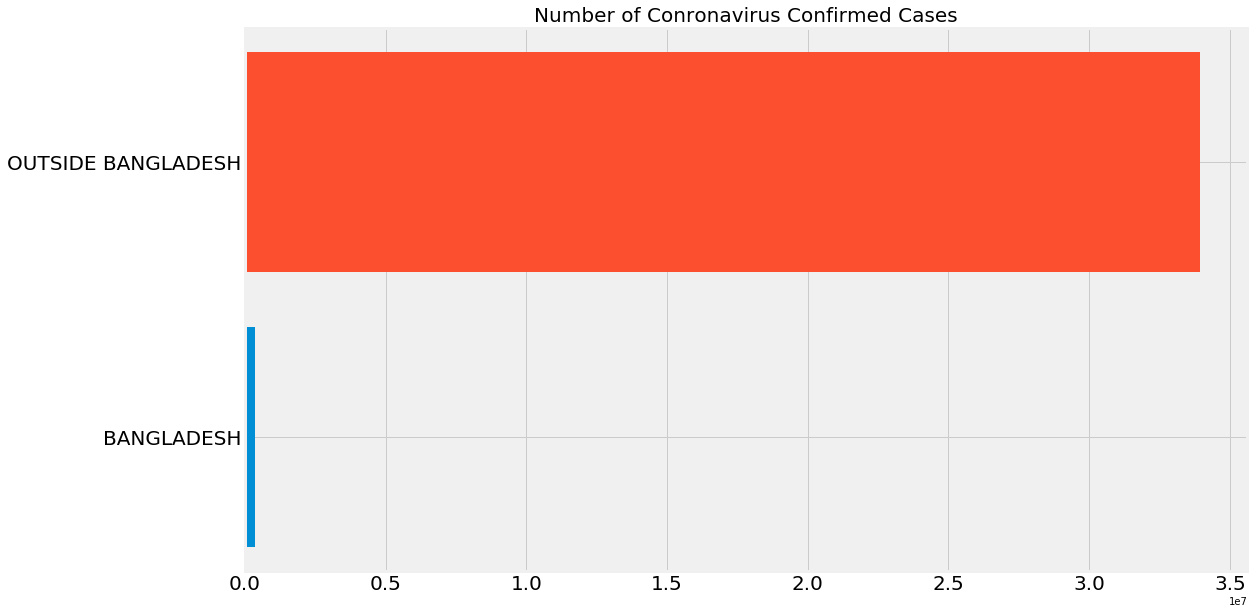

In [63]:
Bangladesh_confirmed = latest_data[latest_data['Country_Region']=='Bangladesh']['Confirmed'].sum()
outside_Bangadesh_confirmed = np.sum(country_confirm_cases)-Bangladesh_confirmed
plt.figure(figsize=(16,10))
plt.barh('BANGLADESH',Bangladesh_confirmed)
plt.barh("OUTSIDE BANGLADESH",outside_Bangadesh_confirmed)
plt.title('Number of Conronavirus Confirmed Cases',size=20)
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

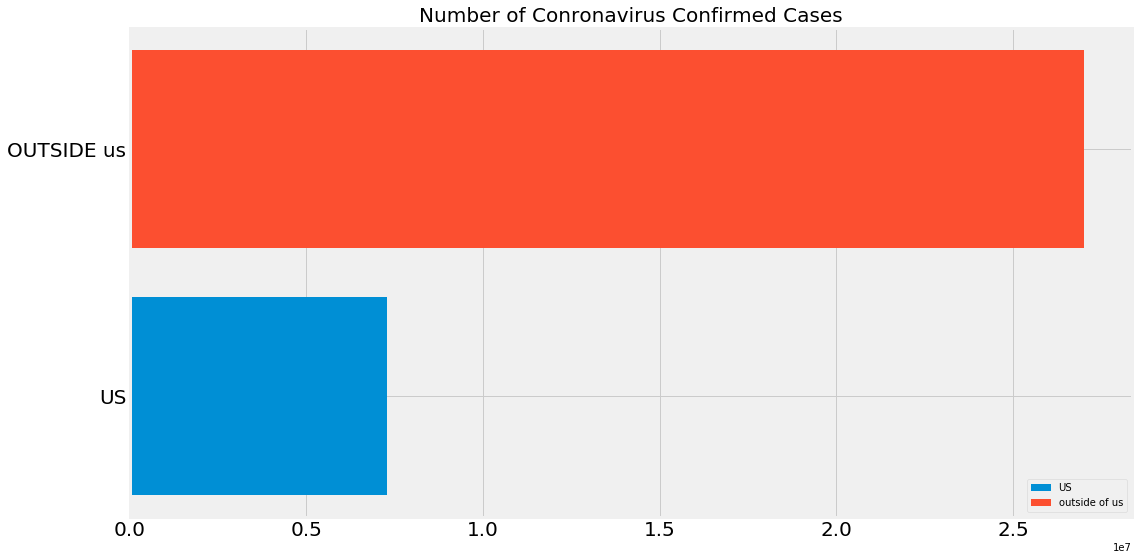

In [64]:
us_confirmed = latest_data[latest_data['Country_Region']=='US']['Confirmed'].sum()
outside_us_confirmed = np.sum(country_confirm_cases)-us_confirmed
plt.figure(figsize=(16,9))
plt.barh('US',us_confirmed)
plt.barh("OUTSIDE us",outside_us_confirmed)
plt.title('Number of Conronavirus Confirmed Cases',size=20)
plt.legend(labels = ['US','outside of us'])
plt.xticks(size=20)
plt.yticks(size=20)
plt.show()

In [65]:
print('Outside Banglades : {} cases '.format(outside_Bangadesh_confirmed))
print('Bangladesh        : {} cases'.format(Bangladesh_confirmed))
print("Total             : {} cases".format(outside_Bangadesh_confirmed+Bangladesh_confirmed))

Outside Banglades : 33924722 cases 
Bangladesh        : 364987 cases
Total             : 34289709 cases


In [66]:
# only show 10 countries with the most confirmed cases, the rest are grouped into other category
visual_unique_countries = []
visual_confirmed_cases = []
others = np.sum(country_confirm_cases[10:])

for i in range(len(country_confirm_cases[:10])):
    visual_unique_countries.append(unique_countries[i])
    visual_confirmed_cases.append(country_confirm_cases[i])
    
visual_unique_countries.append('others')
visual_confirmed_cases.append(others)

In [67]:
visual_unique_countries

['US',
 'India',
 'Brazil',
 'Russia',
 'Colombia',
 'Peru',
 'Spain',
 'Argentina',
 'Mexico',
 'South Africa',
 'others']

In [68]:
def plot_bar_graphs(x, y, title):
    plt.figure(figsize=(16,9))
    plt.barh(x, y)
    plt.title(title,size=20)
    plt.xticks(size=20)
    plt.yticks(size=20)
    plt.show()

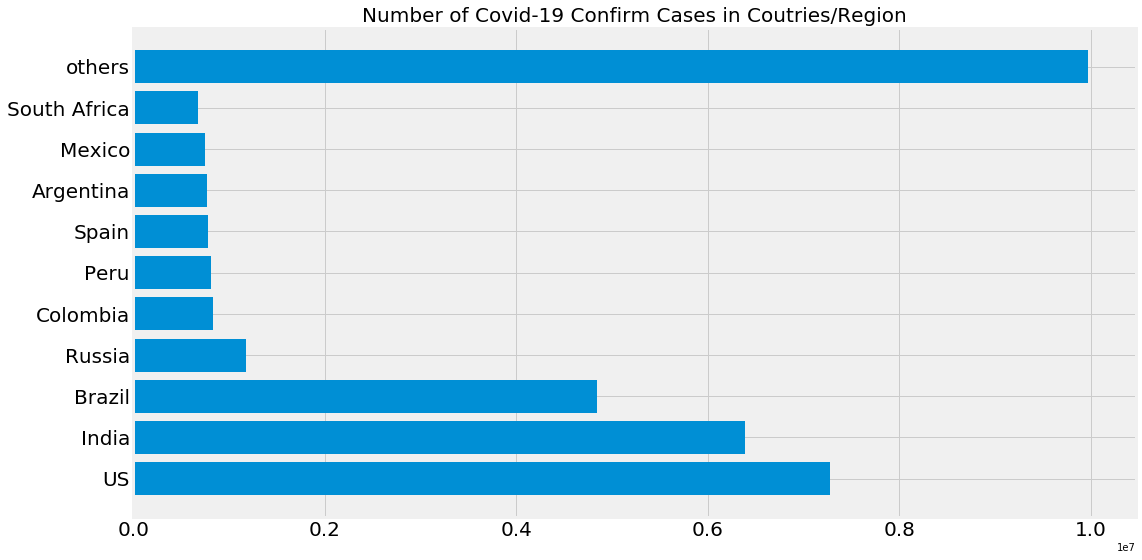

In [69]:
plot_bar_graphs(visual_unique_countries,visual_confirmed_cases,'Number of Covid-19 Confirm Cases in Coutries/Region')

In [70]:
def plot_pie_charts(x, y, title):
    c = random.choices(list(mcolors.CSS4_COLORS.values()),k=len(unique_countries))
    plt.figure(figsize=(20,15))
    plt.pie(y, colors=c)
    plt.title(title,size=20)
    plt.legend(x,loc='best', fontsize=15)
    plt.yticks(size=20)
    plt.show()
    
    
    

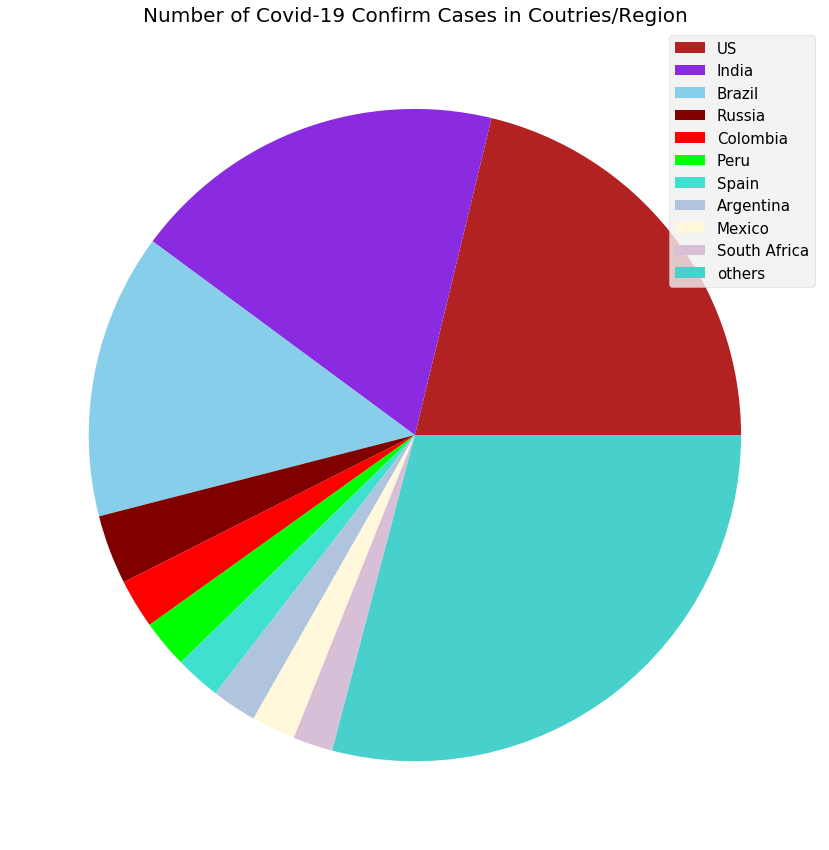

In [71]:
plot_pie_charts(visual_unique_countries,visual_confirmed_cases,'Number of Covid-19 Confirm Cases in Coutries/Region')

In [72]:
# only show 10 provinces with the most confirmed cases, the rest are grouped into other category
visual_unique_province = []
visual_confirmed_cases2 = []
others = np.sum(province_confirmed_cases[10:])

for i in range(len(province_confirmed_cases[:10])):
    visual_unique_province.append(unique_provinces[i])
    visual_confirmed_cases2.append(province_confirmed_cases[i])
    
visual_unique_province.append('others')
visual_confirmed_cases2.append(others)

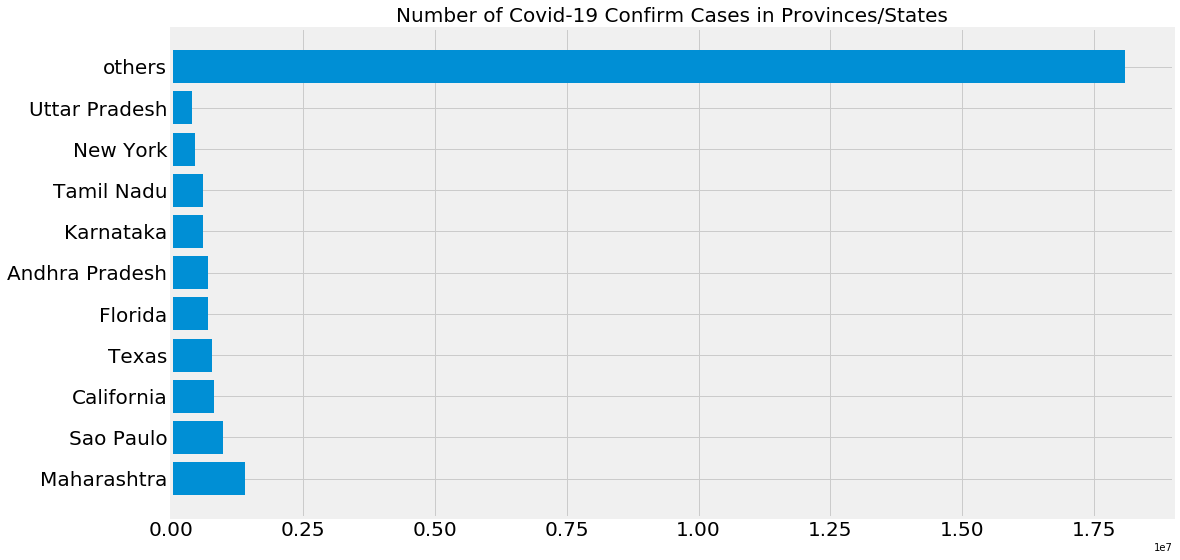

In [73]:
plot_bar_graphs(visual_unique_province,visual_confirmed_cases2,'Number of Covid-19 Confirm Cases in Provinces/States')

In [74]:
def plot_pie_country_with_regions(country_name, title):
    region = list(latest_data[latest_data['Country_Region']==country_name]['Province_State'].unique())
    confirmed_cases = []
    no_cases = []
    for i in region:
        cases = latest_data[latest_data['Province_State']==i]['Confirmed'].sum()
        if cases > 0:
            confirmed_cases.append(cases)
        else: 
            no_cases.append(i)
        
    for i in no_cases:
        region.remove(i)
    
    region = [k for k,v in sorted(zip(region,confirmed_cases),key=operator.itemgetter(1),reverse=True)]
    
    for i in range(len(region)):
        confirmed_cases[i] = latest_data[latest_data['Province_State']==region[i]]['Confirmed'].sum()
    
    #Additional province/state will be conciderd 'others'
    
    if (len(region)>10):
        region_10 = region[:10]
        region_10.append('others')
        confirmed_cases = confirmed_cases[:10]
        confirmed_cases.append(np.sum(confirmed_cases[10:]))
        plot_pie_charts(region, confirmed_cases, title)
    else:
         plot_pie_charts(region, confirmed_cases, title)

In [75]:
unique_provinces_country = []
for i in province_country:
    if i not in unique_provinces_country:
        unique_provinces_country.append(i)
unique_provinces_country

['India',
 'Brazil',
 'US',
 'United Kingdom',
 'Peru',
 'Russia',
 'Chile',
 'Colombia',
 'Spain',
 'Pakistan',
 'Mexico',
 'Italy',
 'Canada',
 'Germany',
 'China',
 'Netherlands',
 'Japan',
 'Sweden',
 'Ukraine',
 'Australia',
 'France',
 'Denmark']

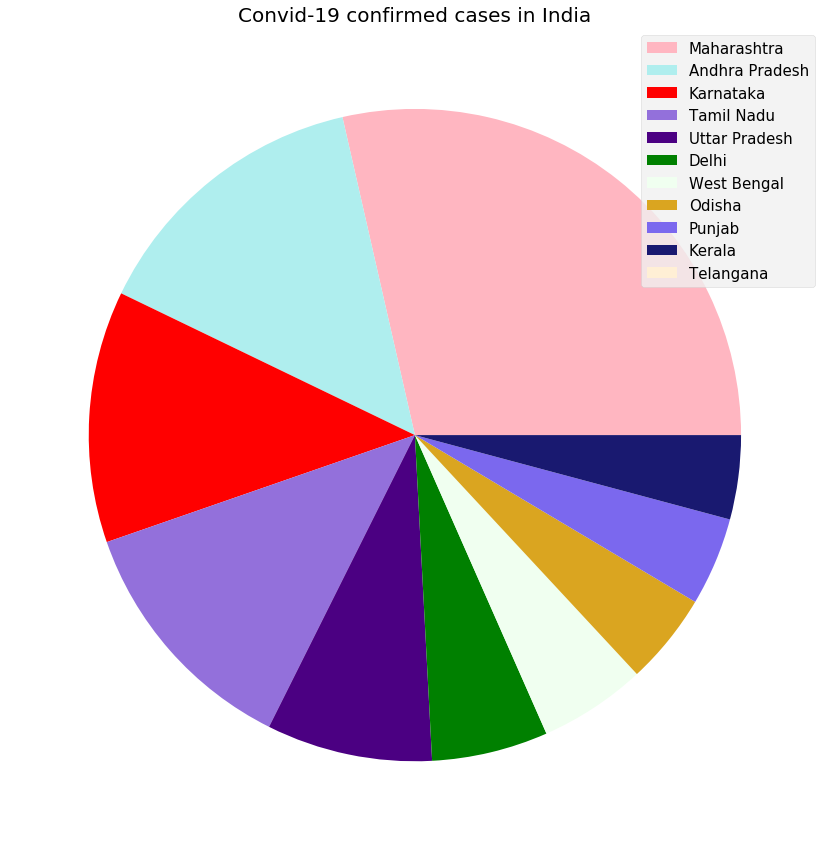

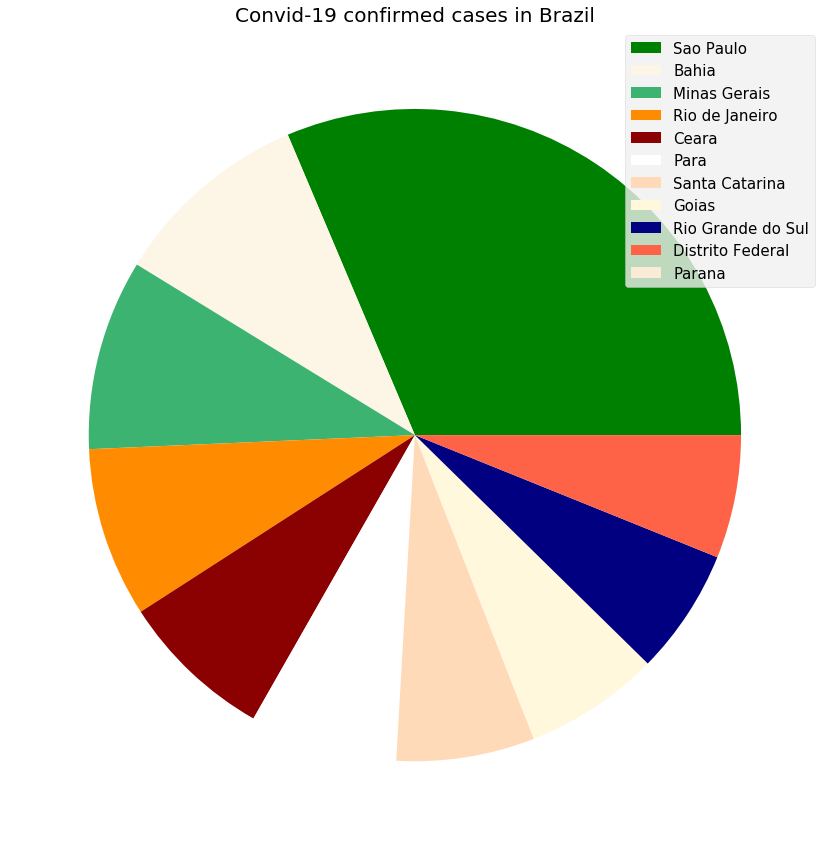

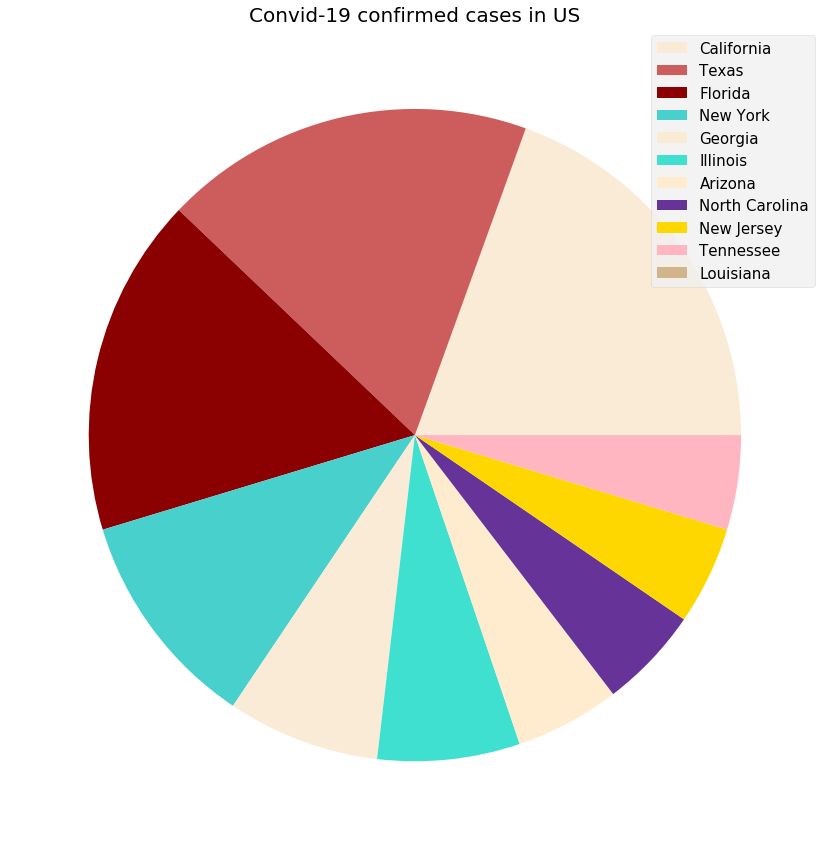

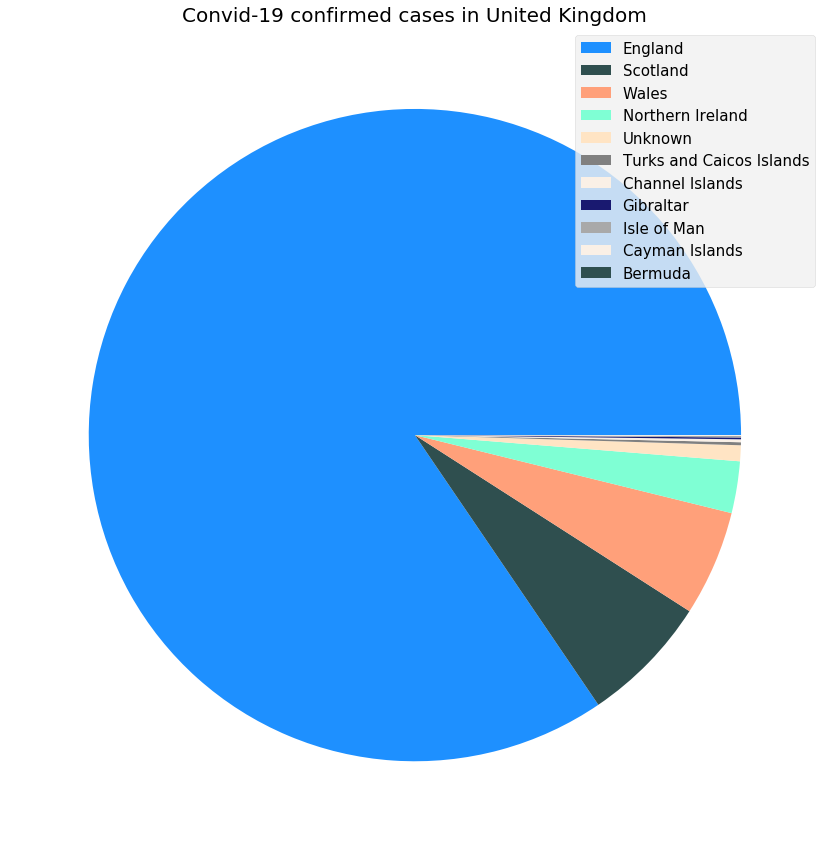

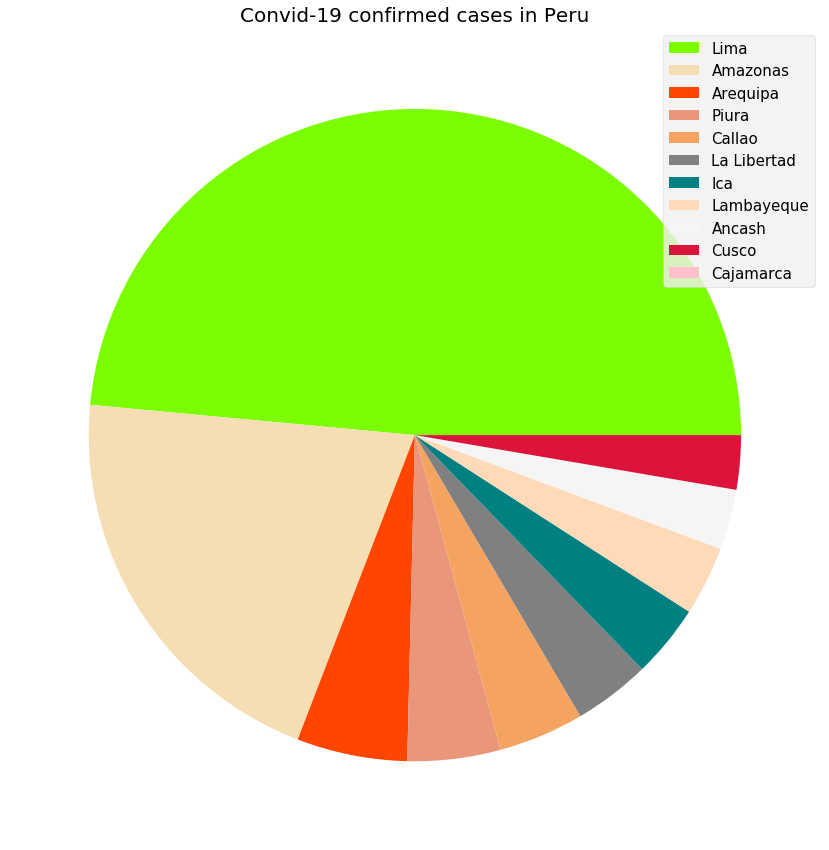

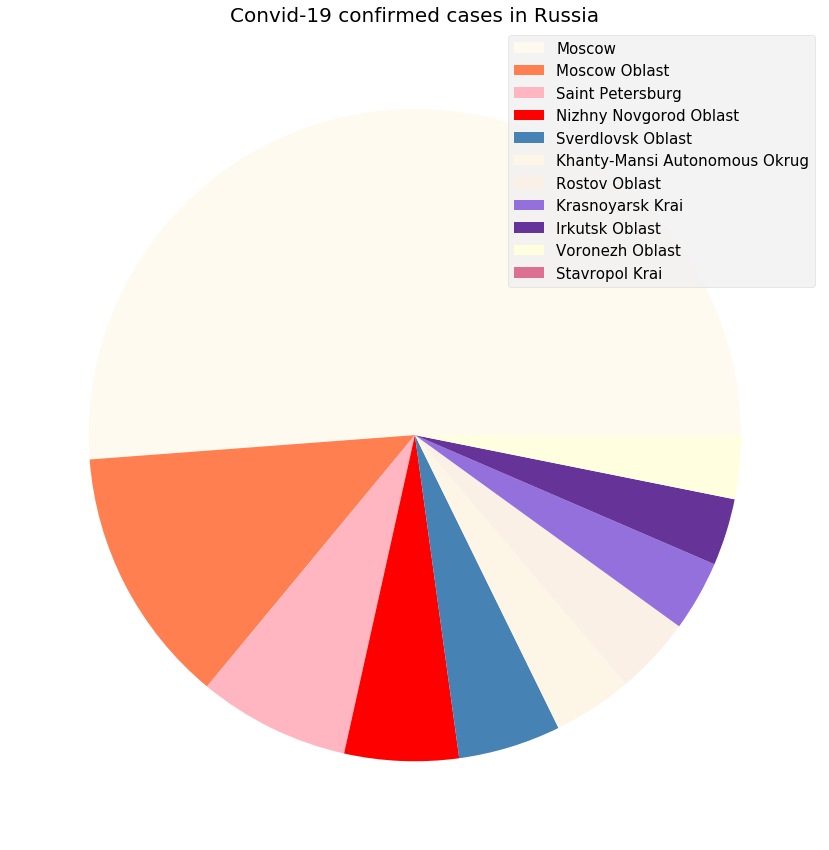

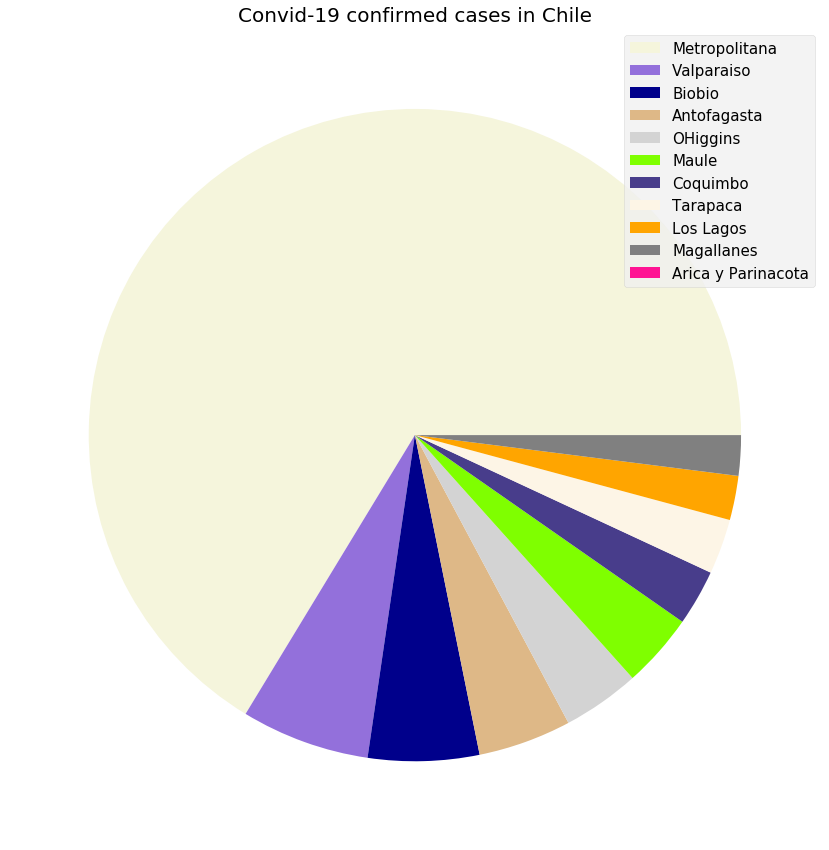

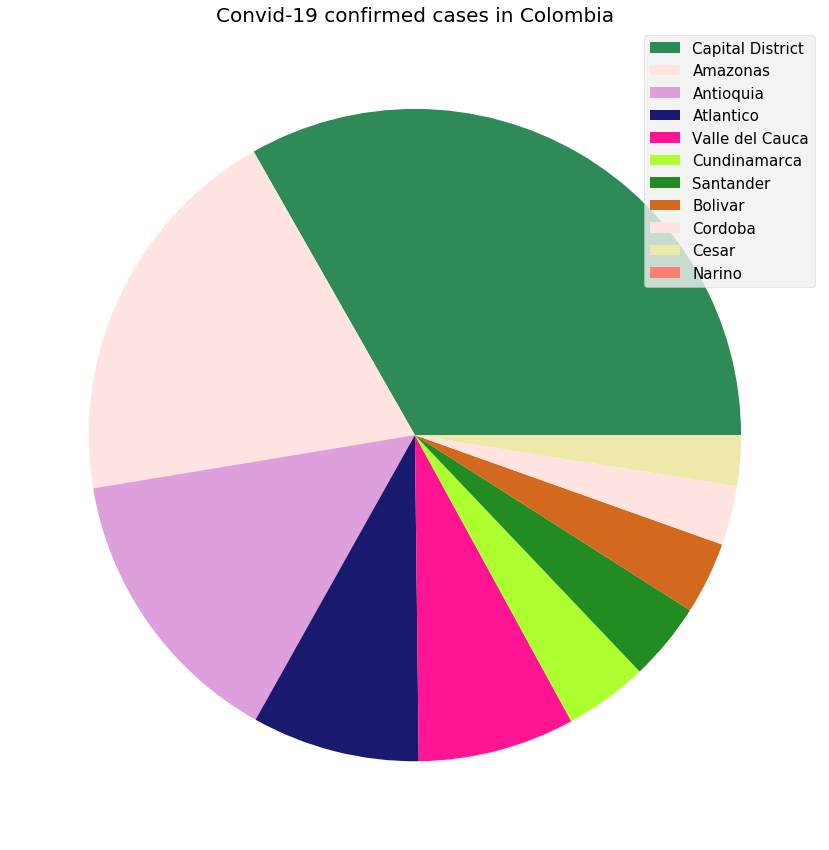

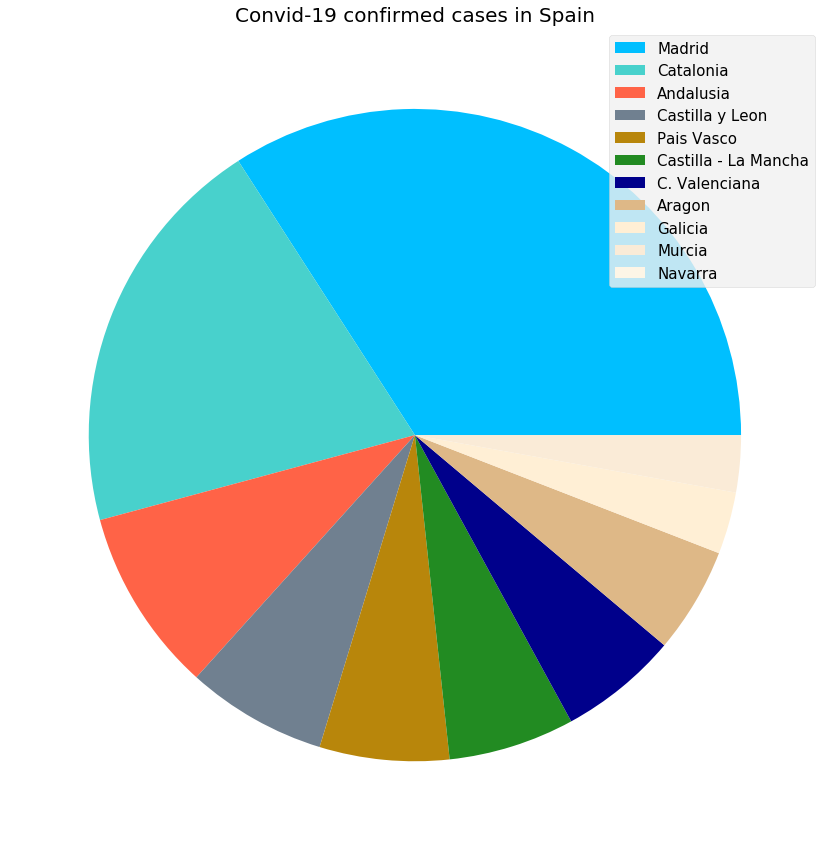

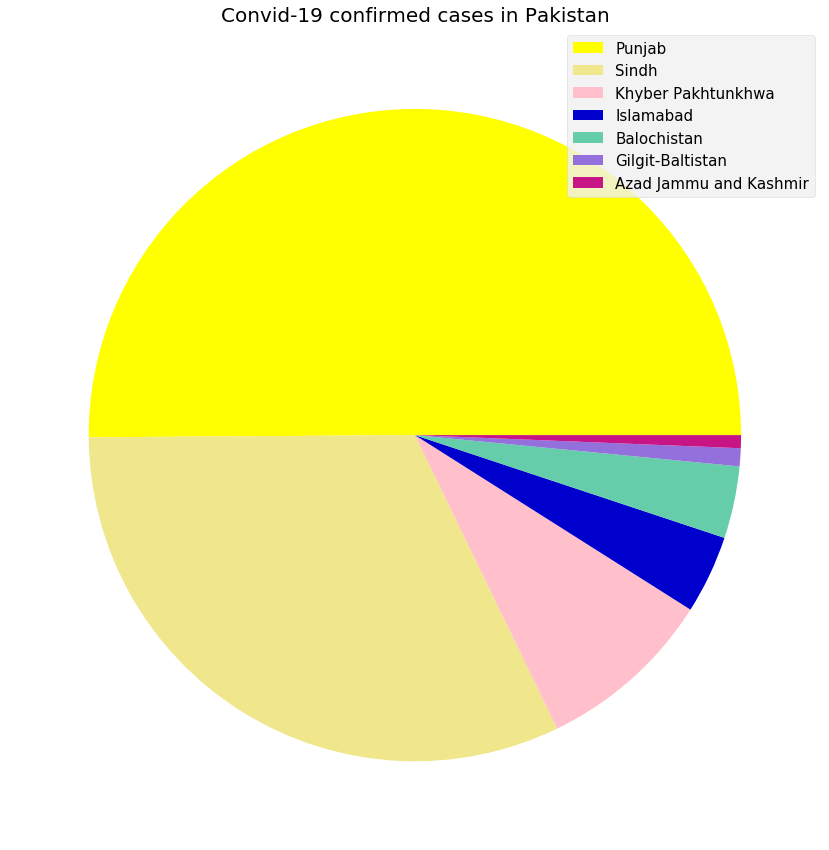

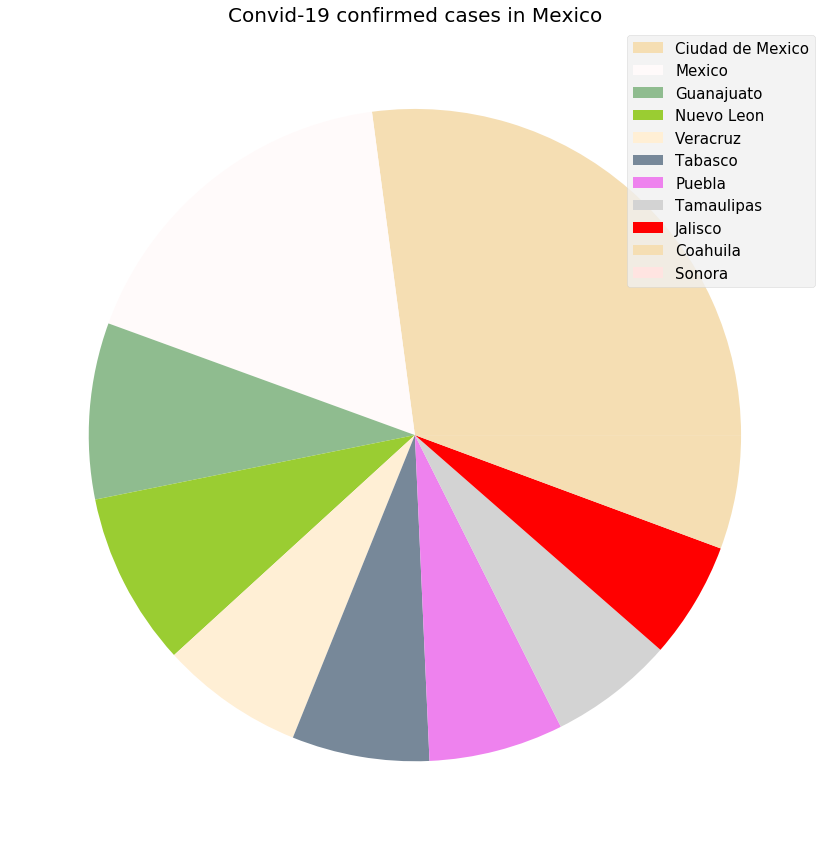

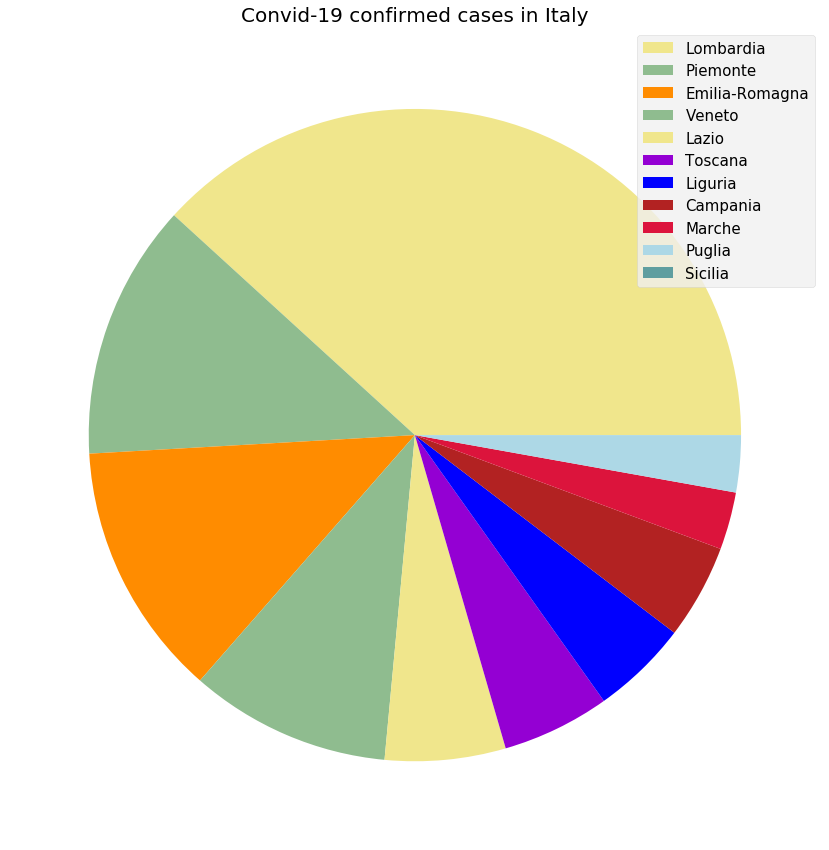

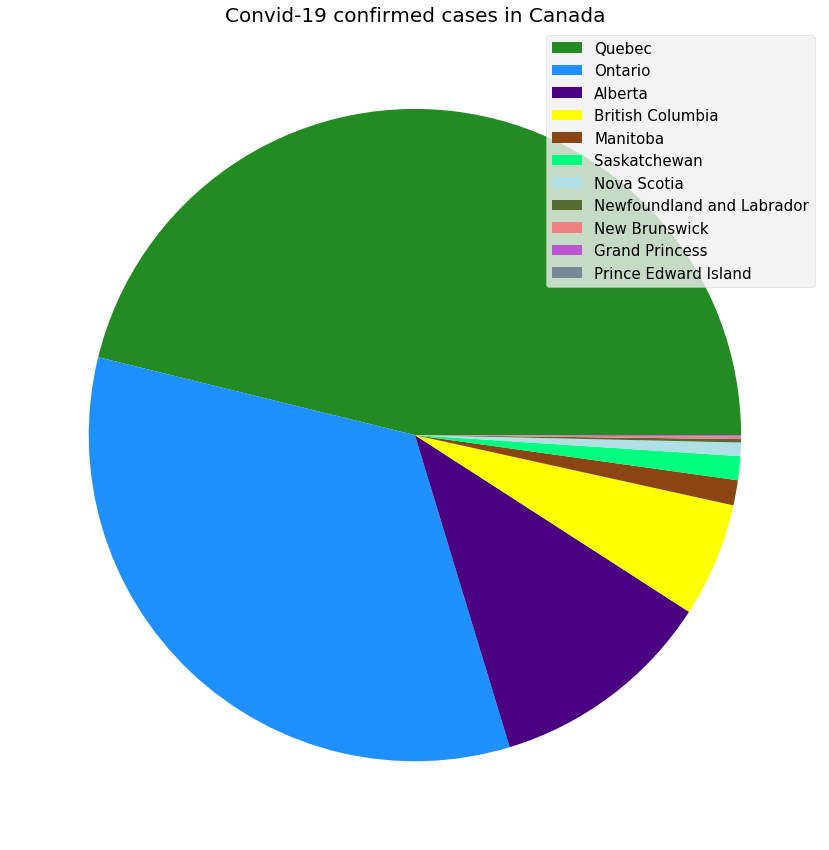

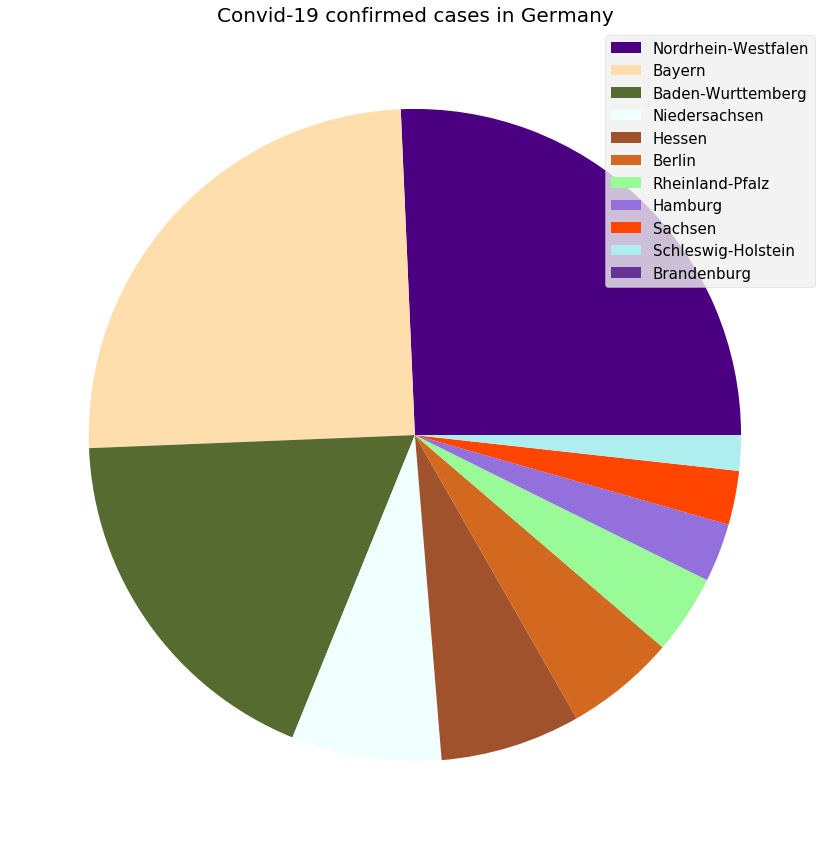

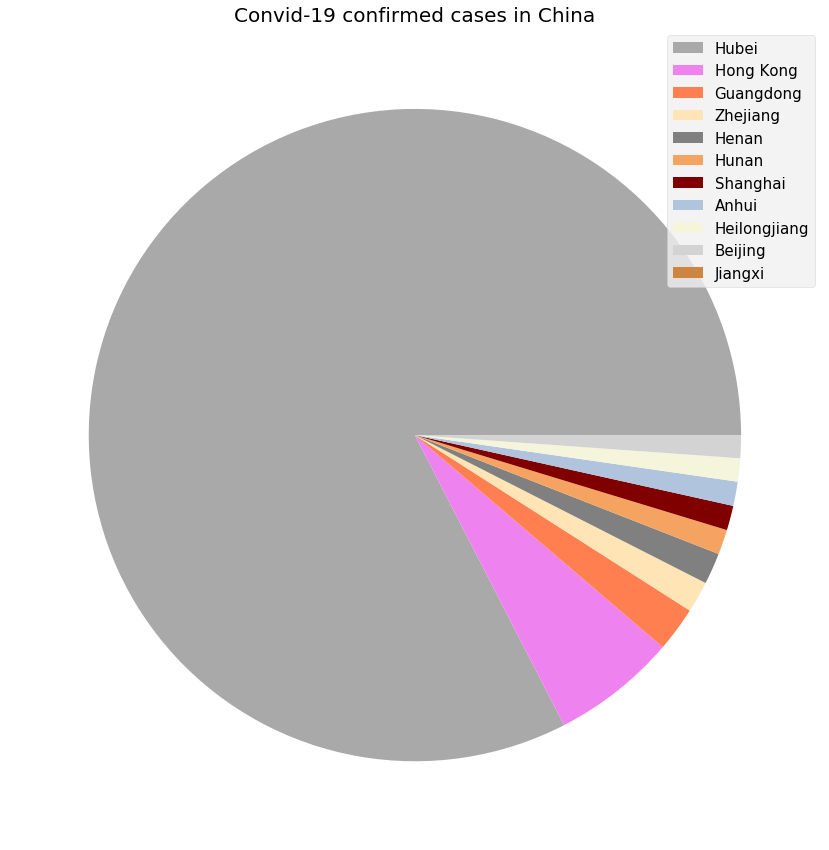

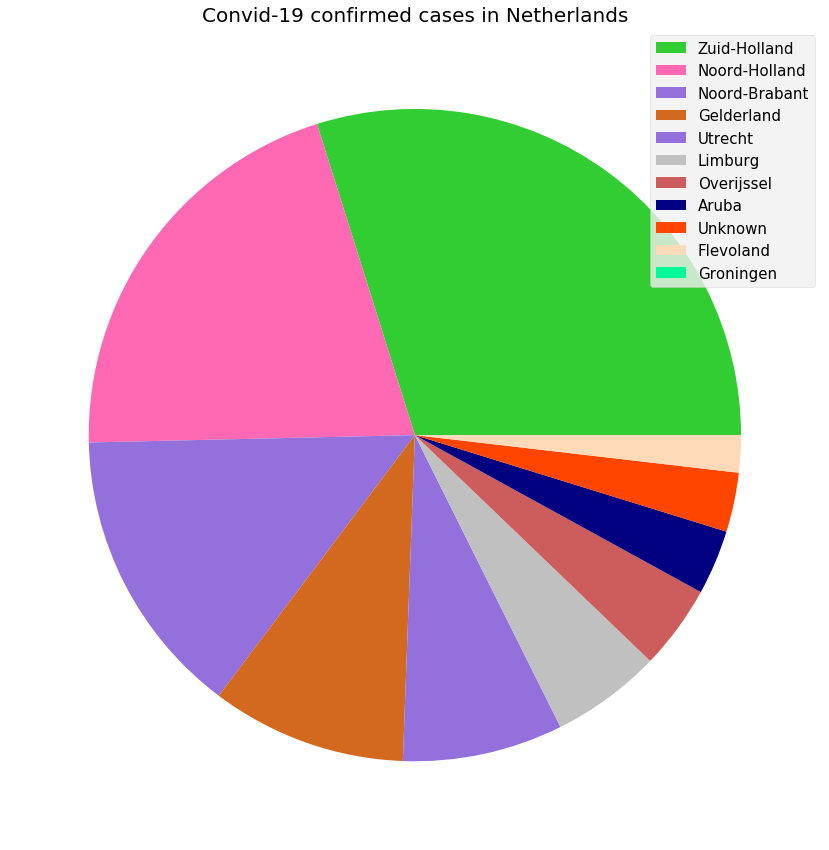

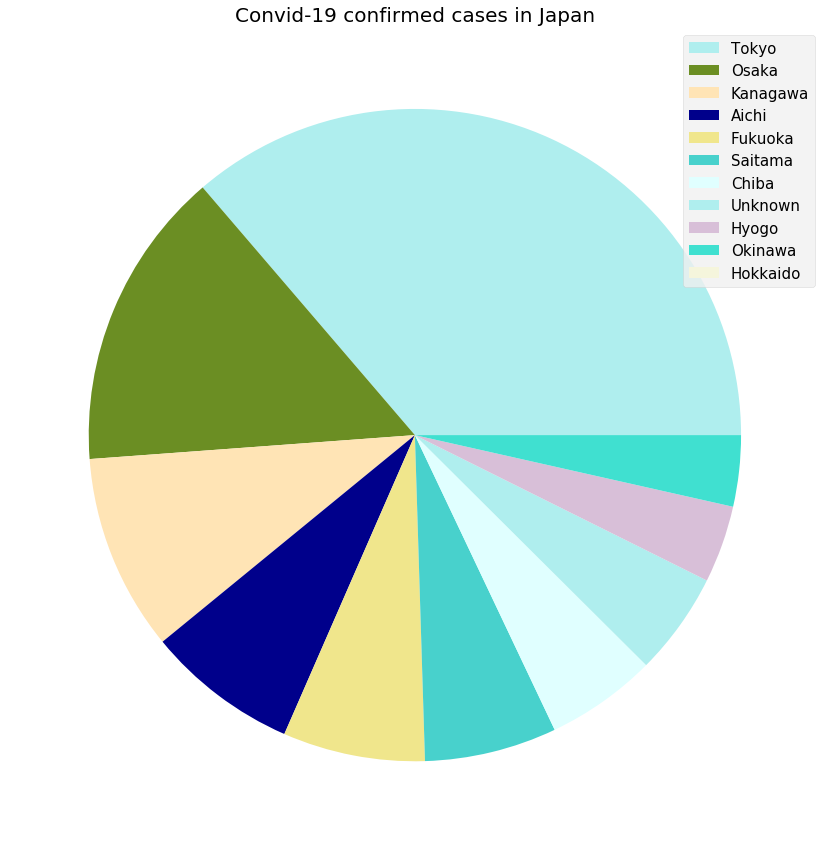

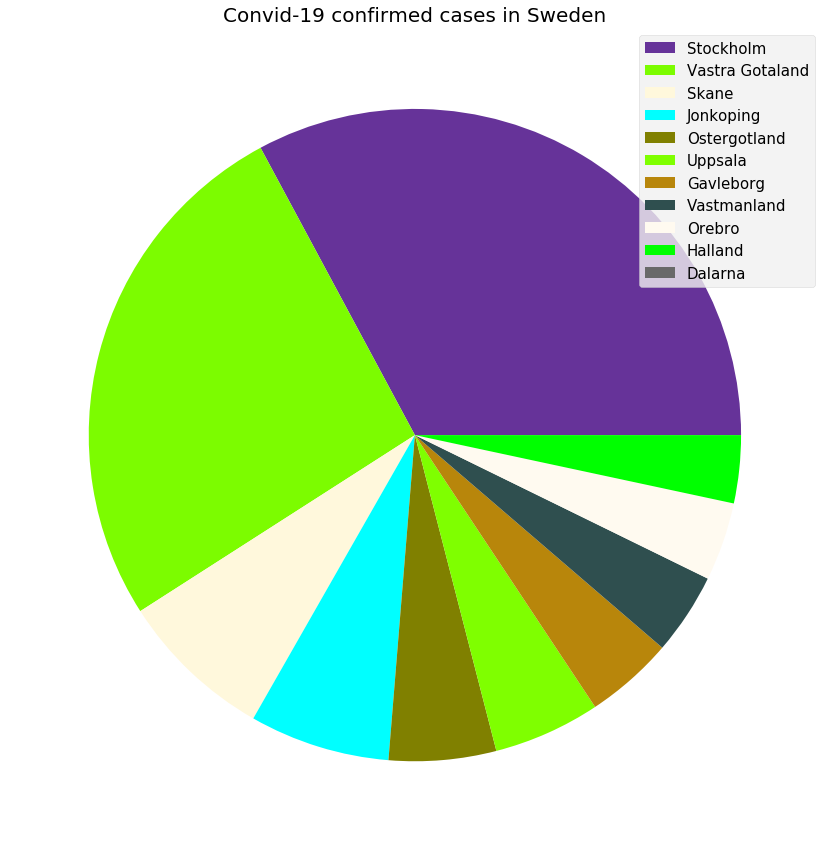

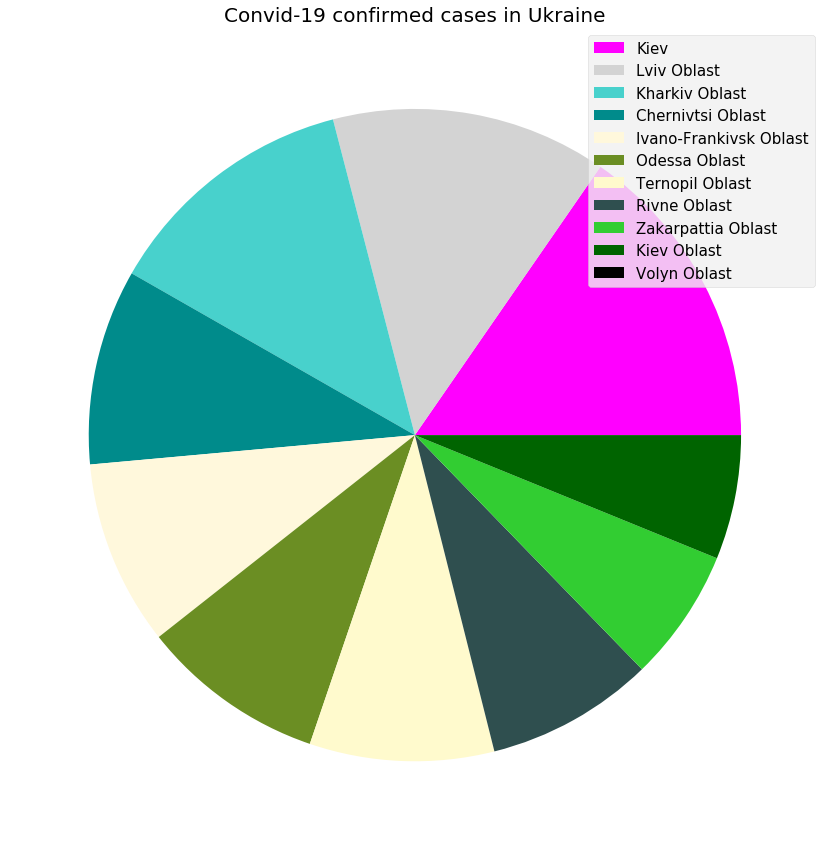

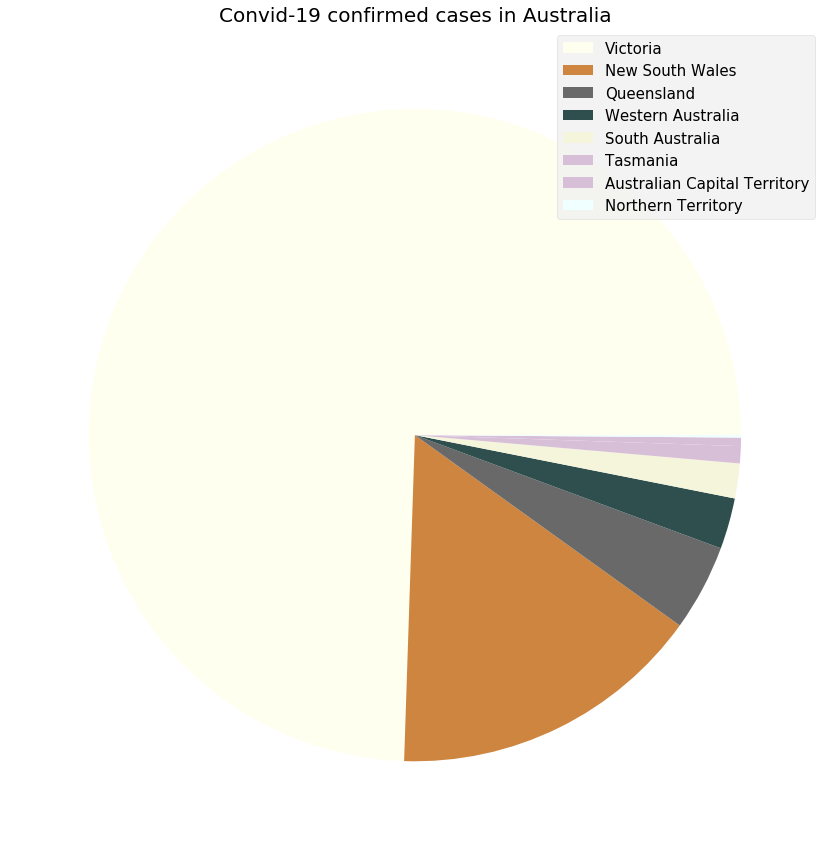

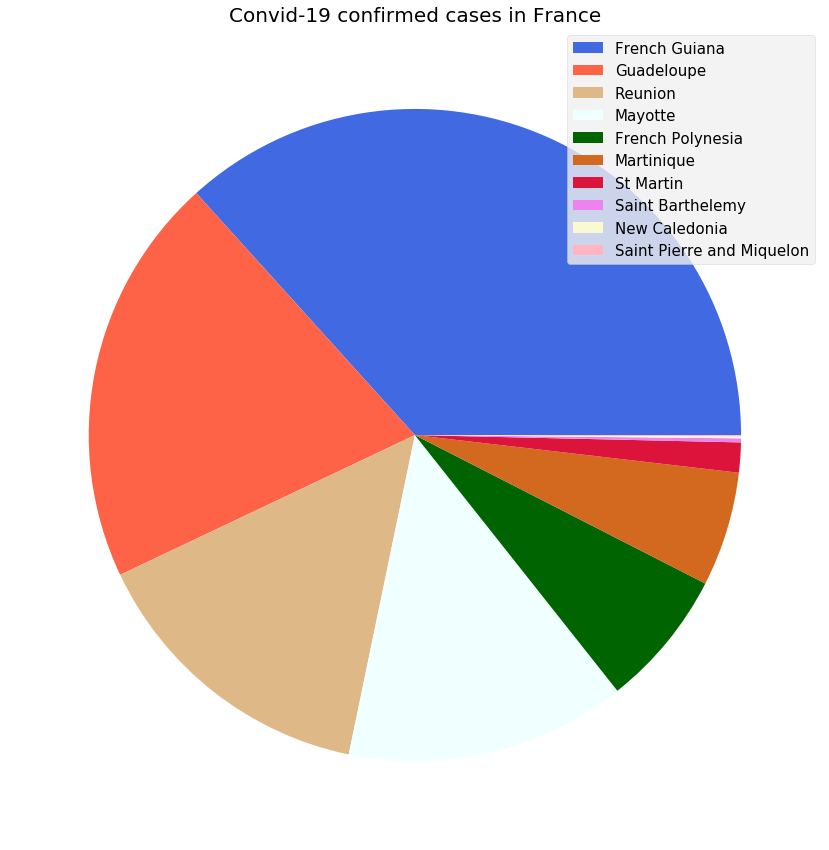

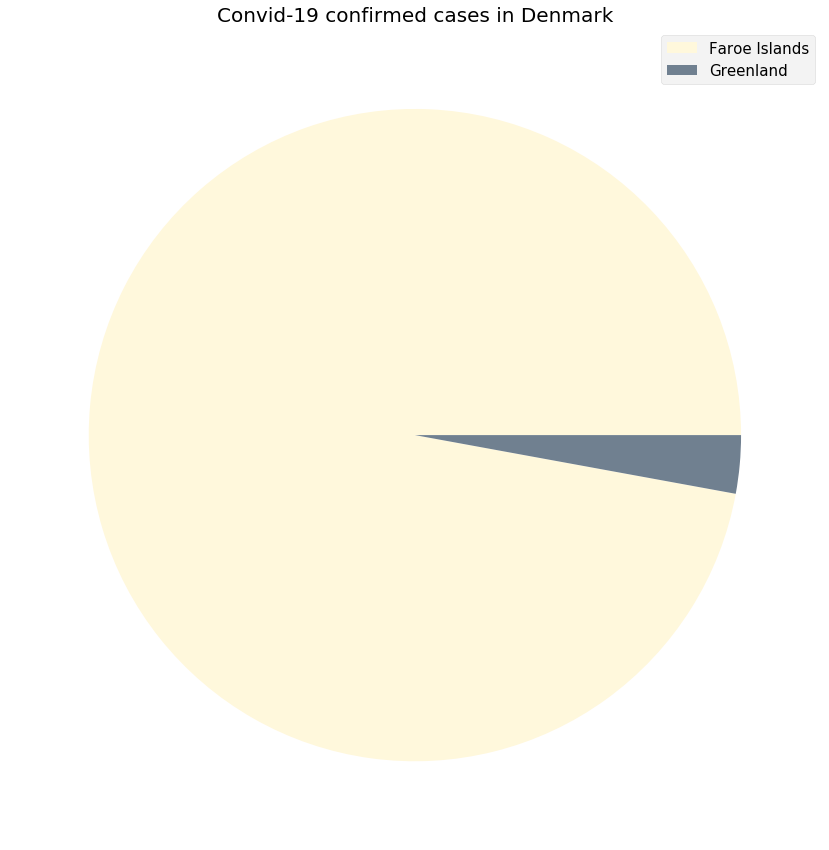

In [76]:
for i in unique_provinces_country:
    plot_pie_country_with_regions(i,'Convid-19 confirmed cases in {}'.format(i))

In [77]:
days_since_1_22 = np.array([i for i in range(len(dates))]).reshape(-1,1)
world_cases = np.array(world_cases).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_deaths = np.array(total_deaths).reshape(-1,1)
total_recoveries = np.array(total_recoveries).reshape(-1,1)


In [78]:
days_in_future = 20
future_forecast = np.array([i for i in range(len(dates)+days_in_future
                                            )]).reshape(-1,1)
adjusted_dates = future_forecast[:-20]

In [79]:
adjusted_dates

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [80]:
future_forecast

array([[  0],
       [  1],
       [  2],
       [  3],
       [  4],
       [  5],
       [  6],
       [  7],
       [  8],
       [  9],
       [ 10],
       [ 11],
       [ 12],
       [ 13],
       [ 14],
       [ 15],
       [ 16],
       [ 17],
       [ 18],
       [ 19],
       [ 20],
       [ 21],
       [ 22],
       [ 23],
       [ 24],
       [ 25],
       [ 26],
       [ 27],
       [ 28],
       [ 29],
       [ 30],
       [ 31],
       [ 32],
       [ 33],
       [ 34],
       [ 35],
       [ 36],
       [ 37],
       [ 38],
       [ 39],
       [ 40],
       [ 41],
       [ 42],
       [ 43],
       [ 44],
       [ 45],
       [ 46],
       [ 47],
       [ 48],
       [ 49],
       [ 50],
       [ 51],
       [ 52],
       [ 53],
       [ 54],
       [ 55],
       [ 56],
       [ 57],
       [ 58],
       [ 59],
       [ 60],
       [ 61],
       [ 62],
       [ 63],
       [ 64],
       [ 65],
       [ 66],
       [ 67],
       [ 68],
       [ 69],
       [ 70],
      

In [81]:
start = '1/22/2020'
start_dates = datetime.datetime.strptime(start, '%m/%d/%Y')
future_forecast_dates = []
for i in range(len(future_forecast)):
    future_forecast_dates.append((start_dates+datetime.timedelta(days=i)).strftime('%m/%d/%Y'))

In [82]:
future_forecast_dates

['01/22/2020',
 '01/23/2020',
 '01/24/2020',
 '01/25/2020',
 '01/26/2020',
 '01/27/2020',
 '01/28/2020',
 '01/29/2020',
 '01/30/2020',
 '01/31/2020',
 '02/01/2020',
 '02/02/2020',
 '02/03/2020',
 '02/04/2020',
 '02/05/2020',
 '02/06/2020',
 '02/07/2020',
 '02/08/2020',
 '02/09/2020',
 '02/10/2020',
 '02/11/2020',
 '02/12/2020',
 '02/13/2020',
 '02/14/2020',
 '02/15/2020',
 '02/16/2020',
 '02/17/2020',
 '02/18/2020',
 '02/19/2020',
 '02/20/2020',
 '02/21/2020',
 '02/22/2020',
 '02/23/2020',
 '02/24/2020',
 '02/25/2020',
 '02/26/2020',
 '02/27/2020',
 '02/28/2020',
 '02/29/2020',
 '03/01/2020',
 '03/02/2020',
 '03/03/2020',
 '03/04/2020',
 '03/05/2020',
 '03/06/2020',
 '03/07/2020',
 '03/08/2020',
 '03/09/2020',
 '03/10/2020',
 '03/11/2020',
 '03/12/2020',
 '03/13/2020',
 '03/14/2020',
 '03/15/2020',
 '03/16/2020',
 '03/17/2020',
 '03/18/2020',
 '03/19/2020',
 '03/20/2020',
 '03/21/2020',
 '03/22/2020',
 '03/23/2020',
 '03/24/2020',
 '03/25/2020',
 '03/26/2020',
 '03/27/2020',
 '03/28/20

In [83]:
X_train_confirmed, X_test_confirmed, y_train_confirmed, y_test_confirmed = train_test_split(days_since_1_22,world_cases, test_size=0.25, shuffle=False)

In [84]:
#transform our data for polynomial regression
poly = PolynomialFeatures(degree=3)
poly_X_train_confirmed = poly.fit_transform(X_train_confirmed)
poly_X_test_confirmed = poly.fit_transform(X_test_confirmed)
poly_future_forecast = poly.fit_transform(future_forecast)

In [85]:
#polynomial regression
linear_model = LinearRegression(normalize=True, fit_intercept=False)
linear_model.fit(poly_X_train_confirmed, y_train_confirmed)
test_linear_pred = linear_model.predict(poly_X_test_confirmed)
linear_pred = linear_model.predict(poly_future_forecast)
print('MAF:',mean_absolute_error(test_linear_pred,y_test_confirmed))
print('MSE:',mean_squared_error(test_linear_pred,y_test_confirmed))


MAF: 532445.639227961
MSE: 377825446353.40576


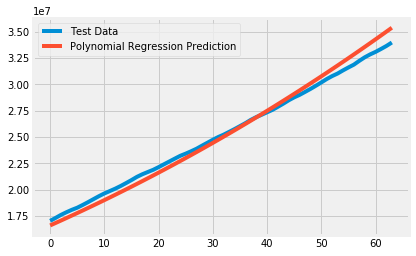

In [86]:
plt.plot(y_test_confirmed)
plt.plot(test_linear_pred)
plt.legend(['Test Data','Polynomial Regression Prediction'])

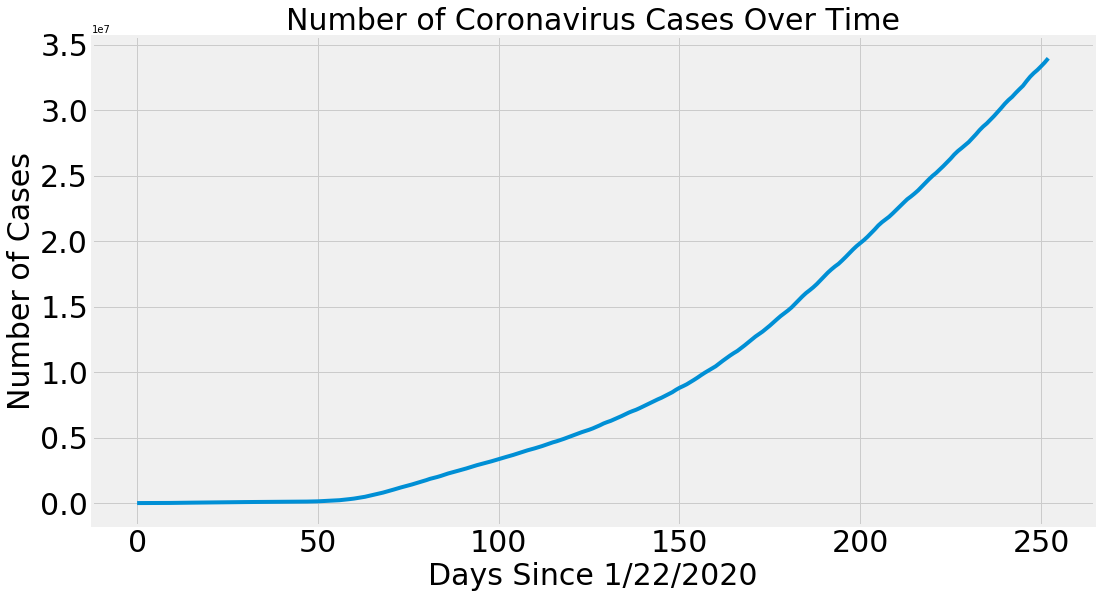

In [87]:
adjusted_dates = adjusted_dates.reshape(1,-1)[0]
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, world_cases)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

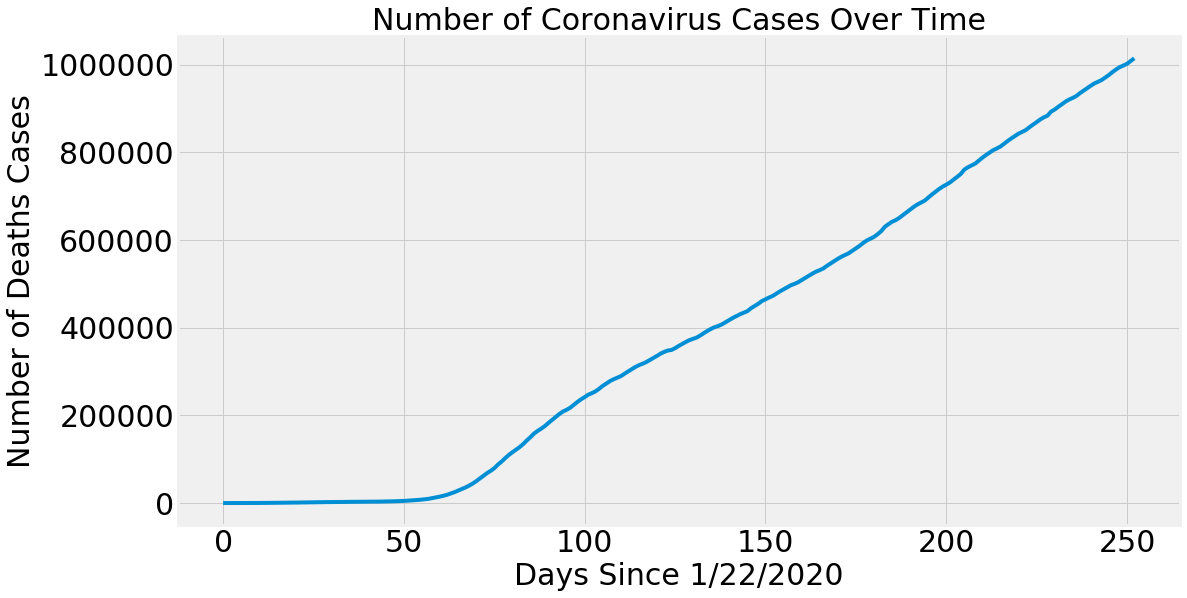

In [88]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_deaths)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Deaths Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

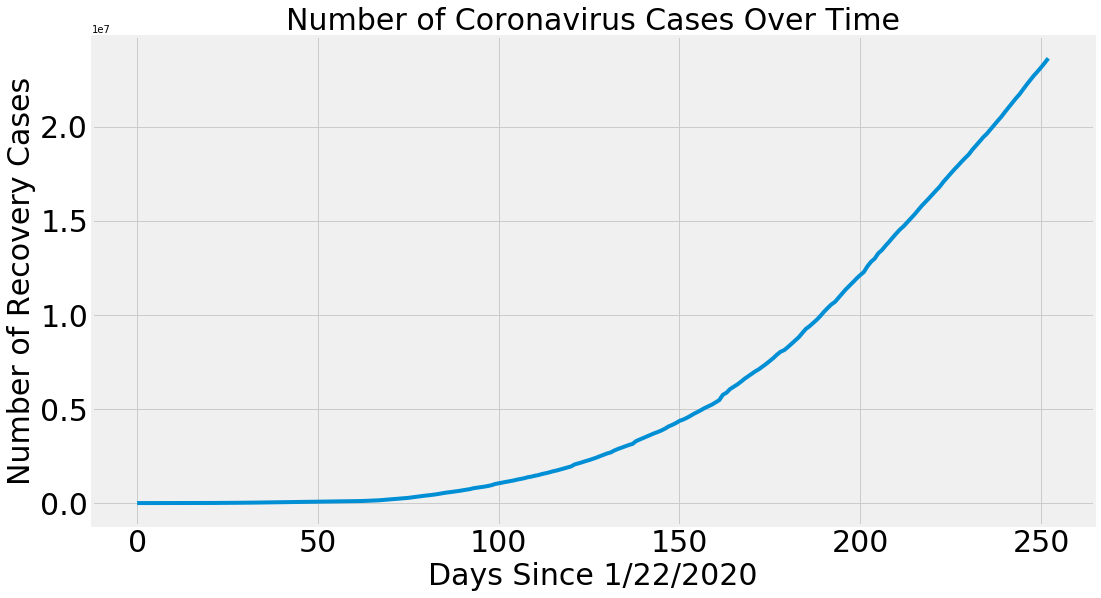

In [89]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_recoveries)
plt.title('Number of Coronavirus Cases Over Time', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Recovery Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

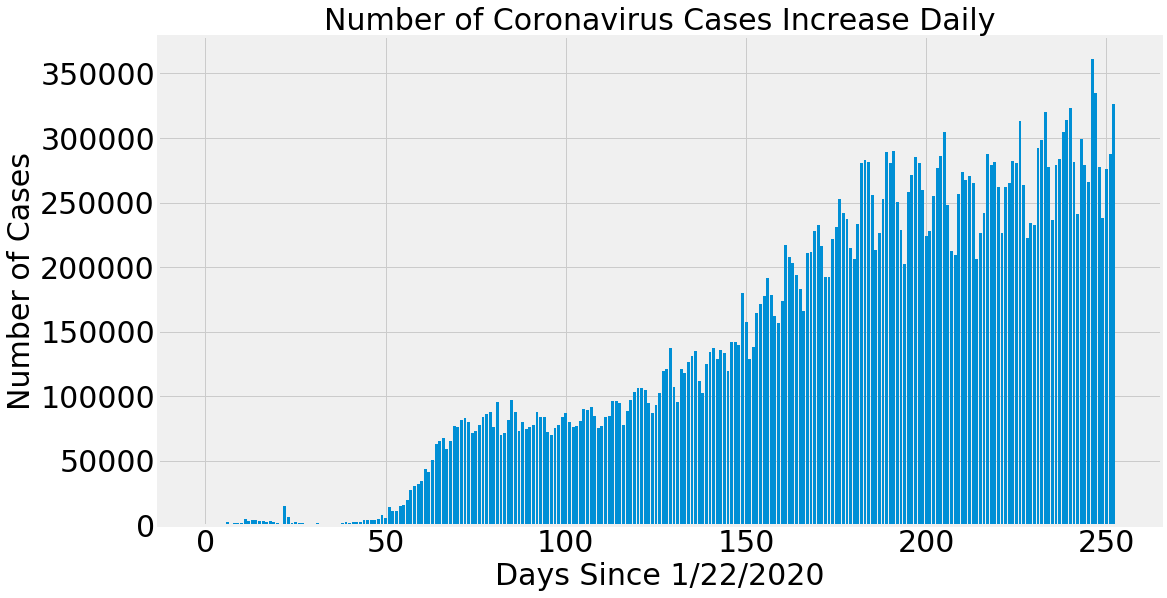

In [90]:
# Whoat is world daily increse positive cases
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_increase)
plt.title('Number of Coronavirus Cases Increase Daily', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

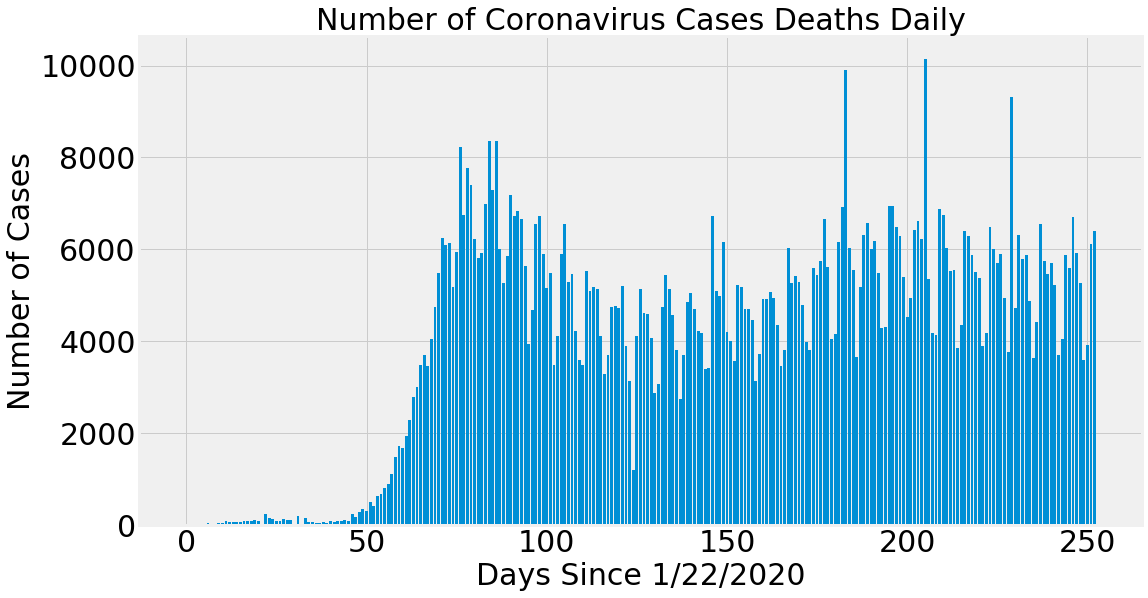

In [91]:
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_deaths)
plt.title('Number of Coronavirus Cases Deaths Daily', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

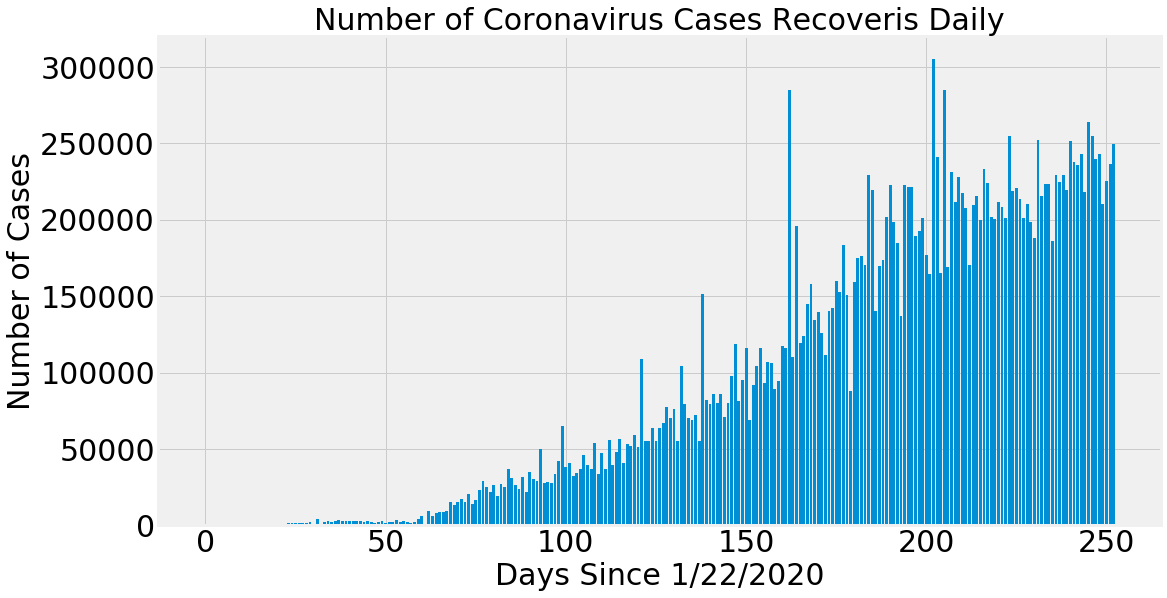

In [92]:
plt.figure(figsize=(16,9))
plt.bar(adjusted_dates, world_daily_recoveries)
plt.title('Number of Coronavirus Cases Recoveris Daily', size=30)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

In [93]:
linear_pred

array([[ 2.56326900e+04],
       [ 1.57486759e+04],
       [ 6.43003127e+03],
       [-2.31567135e+03],
       [-1.04808595e+04],
       [-1.80579607e+04],
       [-2.50394024e+04],
       [-3.14176122e+04],
       [-3.71850176e+04],
       [-4.23340460e+04],
       [-4.68571251e+04],
       [-5.07466822e+04],
       [-5.39951450e+04],
       [-5.65949408e+04],
       [-5.85384973e+04],
       [-5.98182420e+04],
       [-6.04266023e+04],
       [-6.03560057e+04],
       [-5.95988798e+04],
       [-5.81476521e+04],
       [-5.59947501e+04],
       [-5.31326013e+04],
       [-4.95536333e+04],
       [-4.52502734e+04],
       [-4.02149493e+04],
       [-3.44400884e+04],
       [-2.79181182e+04],
       [-2.06414664e+04],
       [-1.26025602e+04],
       [-3.79382743e+03],
       [ 5.79230459e+03],
       [ 1.61634083e+04],
       [ 2.73270562e+04],
       [ 3.92908208e+04],
       [ 5.20622746e+04],
       [ 6.56489900e+04],
       [ 8.00585395e+04],
       [ 9.52984957e+04],
       [ 1.1

In [94]:
# Future predictions using polynomial regression
linear_pred = linear_pred.reshape(1,-1)[0]
poly_df = pd.DataFrame({'Date':future_forecast_dates[-20:],'Predicted number of Confirmed Cases Worldwide':np.round(linear_pred[-20:])})

In [95]:
poly_df

Date  Predicted number of Confirmed Cases Worldwide
0   10/01/2020                                     35744610.0
1   10/02/2020                                     36119161.0
2   10/03/2020                                     36496192.0
3   10/04/2020                                     36875712.0
4   10/05/2020                                     37257729.0
5   10/06/2020                                     37642250.0
6   10/07/2020                                     38029282.0
7   10/08/2020                                     38418833.0
8   10/09/2020                                     38810911.0
9   10/10/2020                                     39205523.0
10  10/11/2020                                     39602676.0
11  10/12/2020                                     40002380.0
12  10/13/2020                                     40404640.0
13  10/14/2020                                     40809464.0
14  10/15/2020                                     41216861.0
15  10/16/2020                                     41626837.0
16  10/17/2020                                     42039401.0
17  10/18/2020                                     42454559.0
18  10/19/2020                                     42872320.0
19  10/20/2020                                     43292690.0

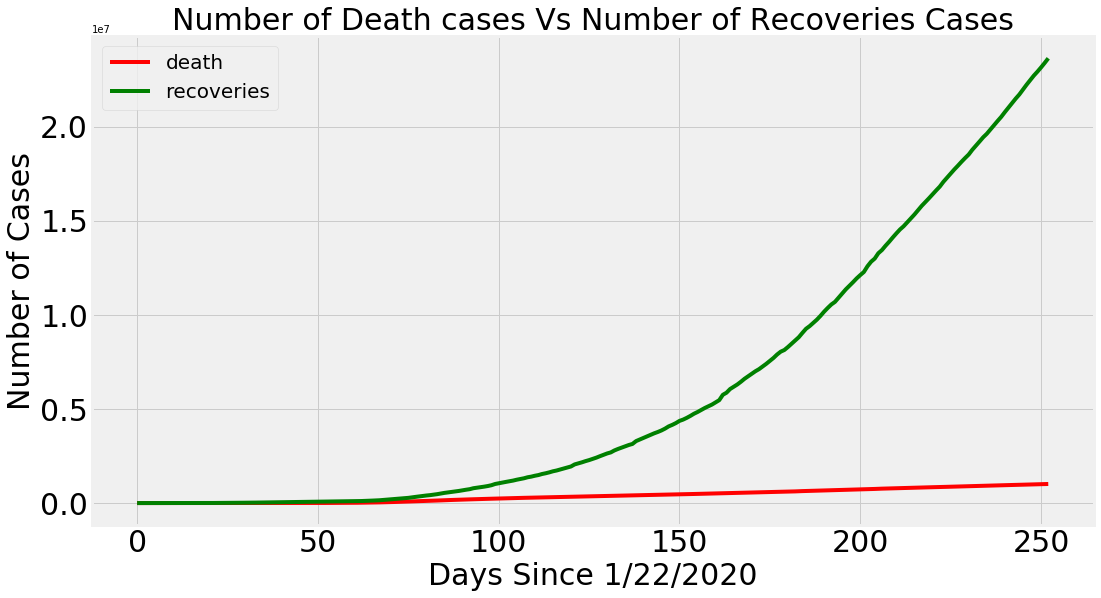

In [96]:
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, total_deaths,color='r')
plt.plot(adjusted_dates, total_recoveries,color='green')
plt.title('Number of Death cases Vs Number of Recoveries Cases', size=30)
plt.legend(['death','recoveries'],loc='best',fontsize=20)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

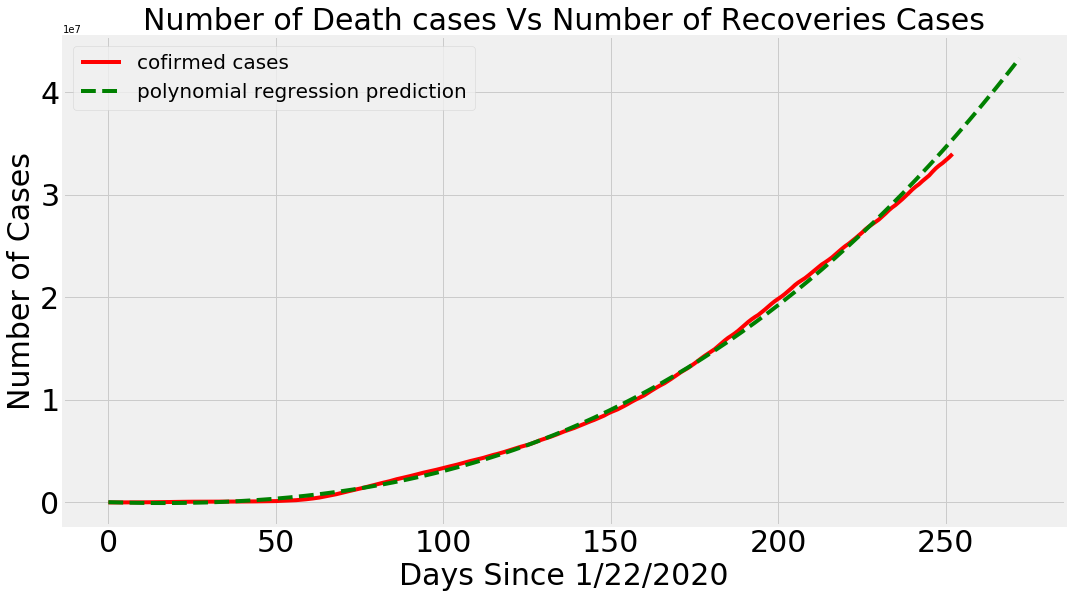

In [97]:
#Figureout the Graph for Prediction of Upcoming cases and Confirmed cases
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, world_cases,color='r')
plt.plot(future_forecast,linear_pred,linestyle='dashed',color='green')
plt.title('Number of Death cases Vs Number of Recoveries Cases', size=30)
plt.legend(['cofirmed cases','polynomial regression prediction'],loc='best',fontsize=20)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

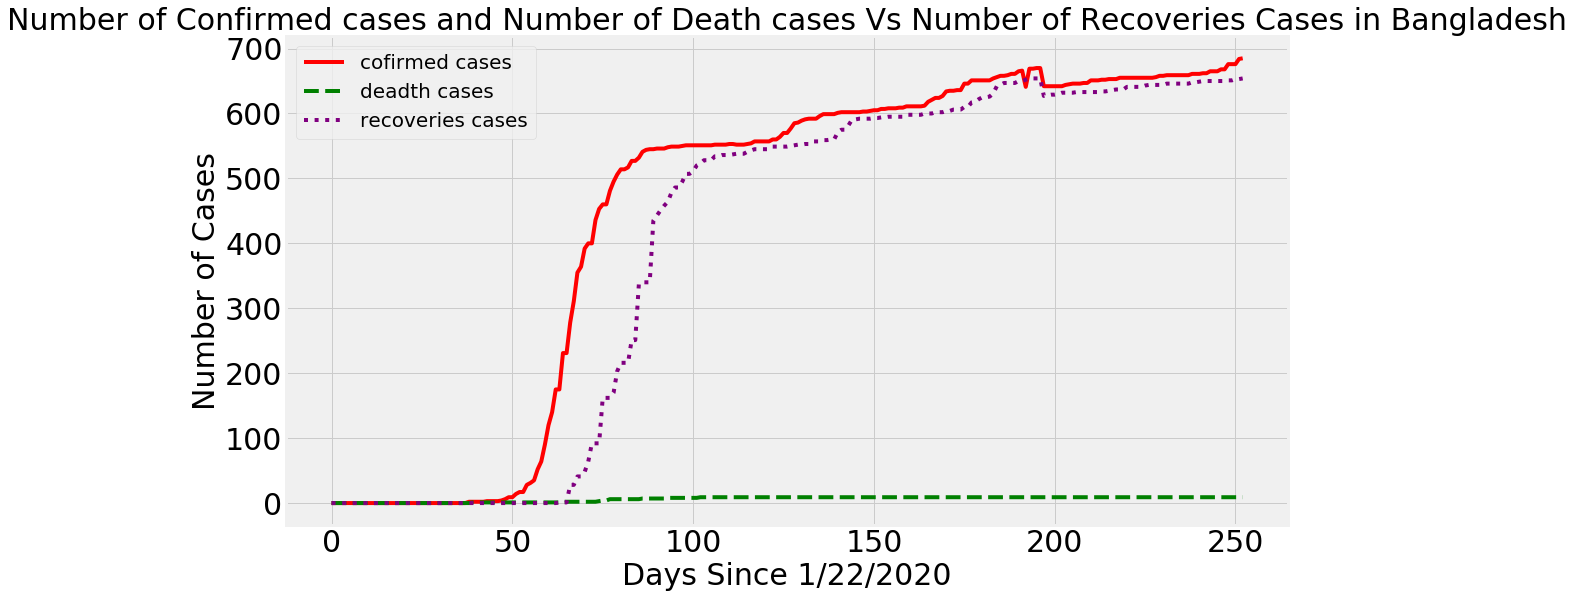

In [98]:
# Figure out total number of death and recoveries cases in Bangladesh
plt.figure(figsize=(16,9))
plt.plot(adjusted_dates, confirmed.loc[15],color='r')
plt.plot(adjusted_dates,deaths.loc[15],linestyle='dashed',color='green')
plt.plot(adjusted_dates,recoveries.loc[15],linestyle='dotted',color='purple')
plt.title('Number of Confirmed cases and Number of Death cases Vs Number of Recoveries Cases in Bangladesh', size=30)
plt.legend(['cofirmed cases','deadth cases','recoveries cases'],loc='best',fontsize=20)
plt.xlabel('Days Since 1/22/2020', size=30)
plt.ylabel('Number of Cases', size=30)
plt.xticks(size=30)
plt.yticks(size=30)
plt.show()

In [99]:
unique_countries = unique_countries[:10]
unique_countries

['US',
 'India',
 'Brazil',
 'Russia',
 'Colombia',
 'Peru',
 'Spain',
 'Argentina',
 'Mexico',
 'South Africa']

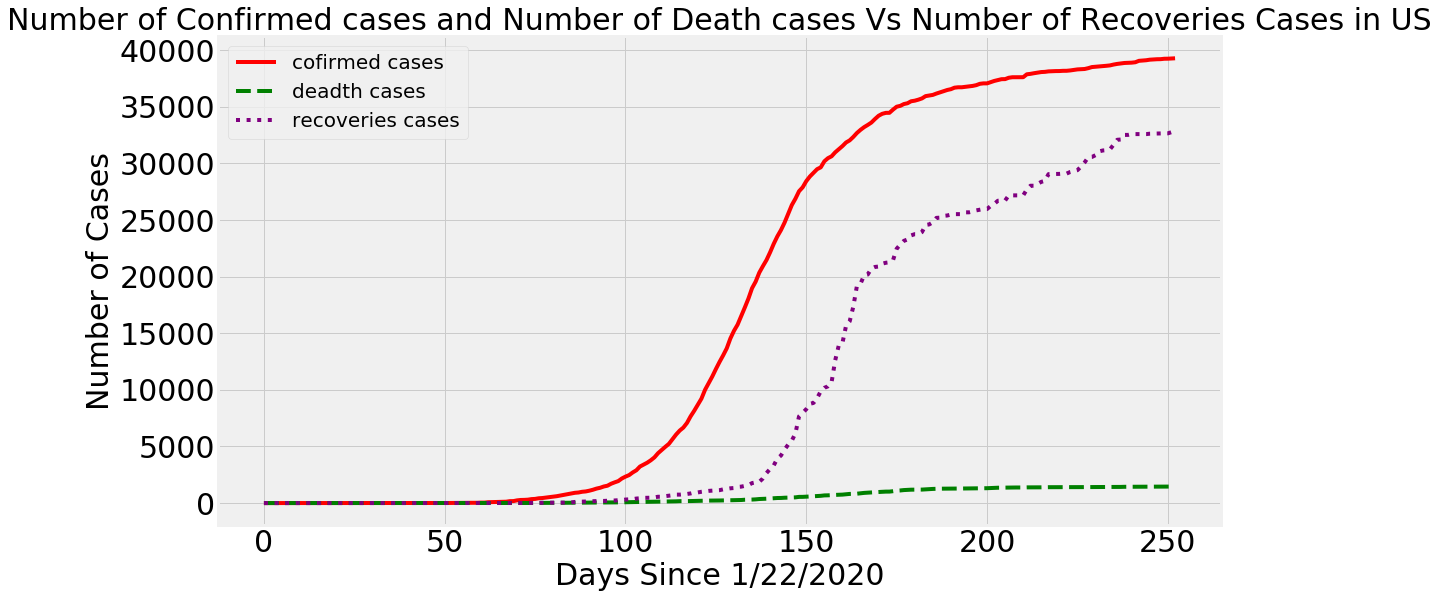

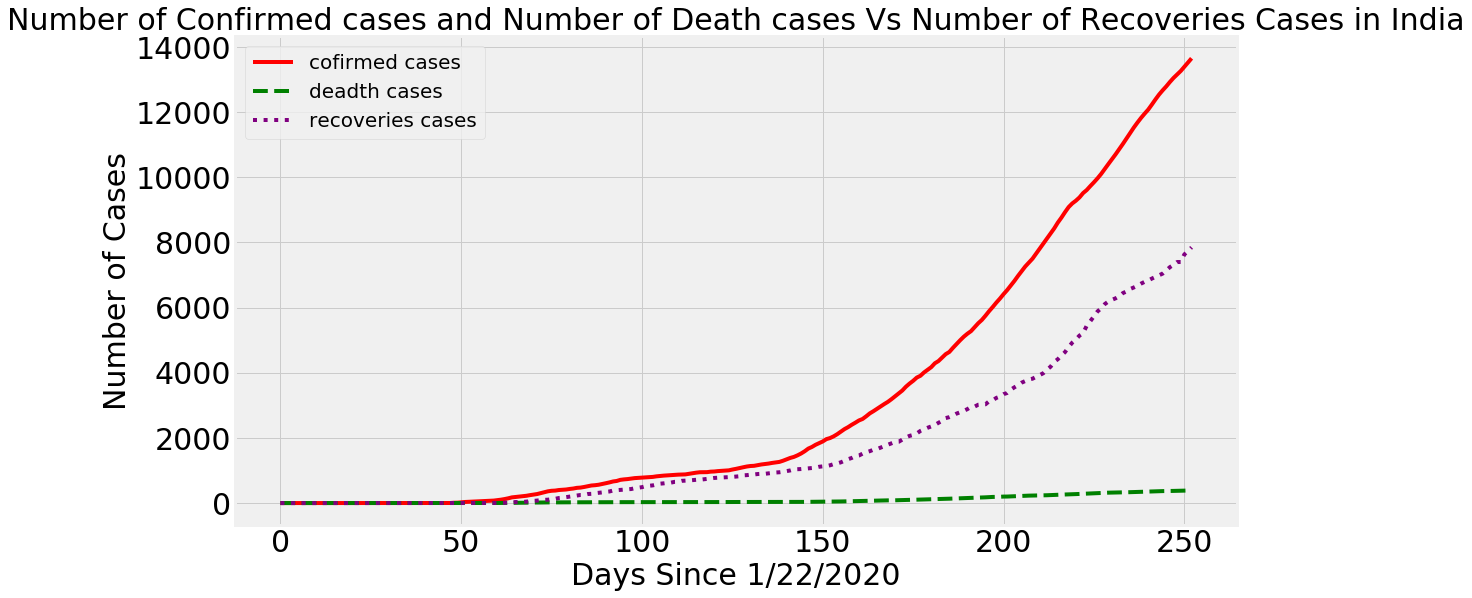

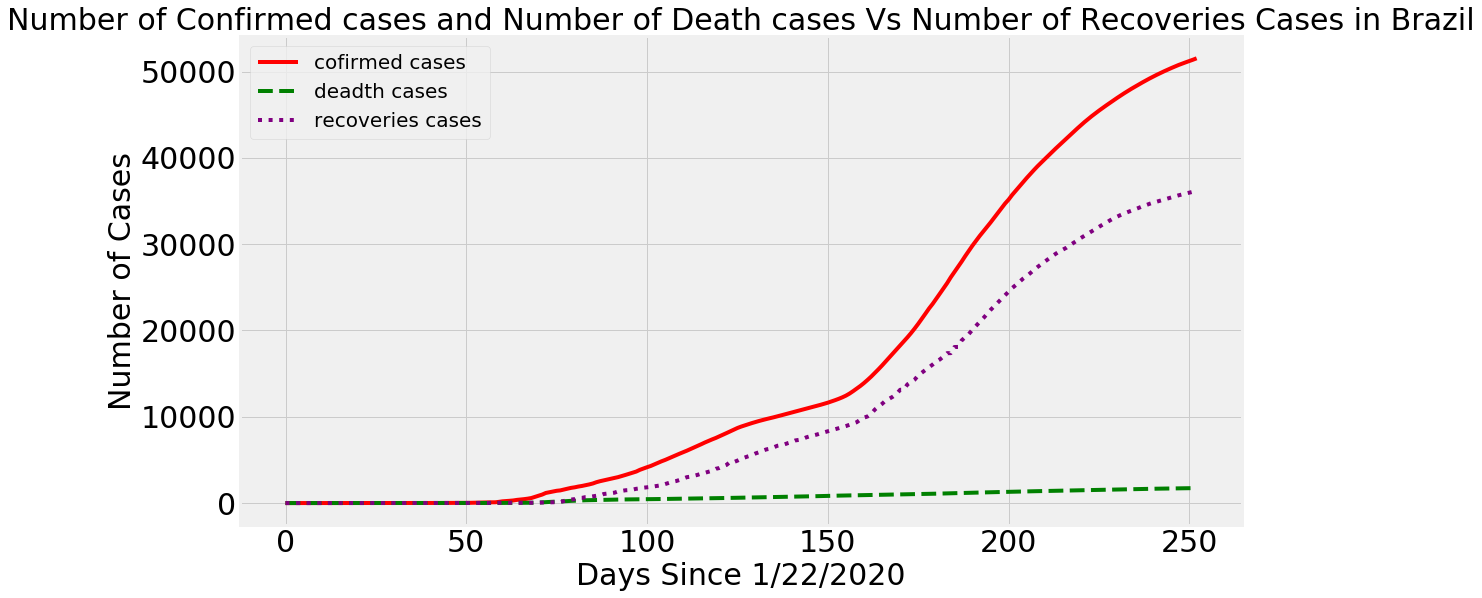

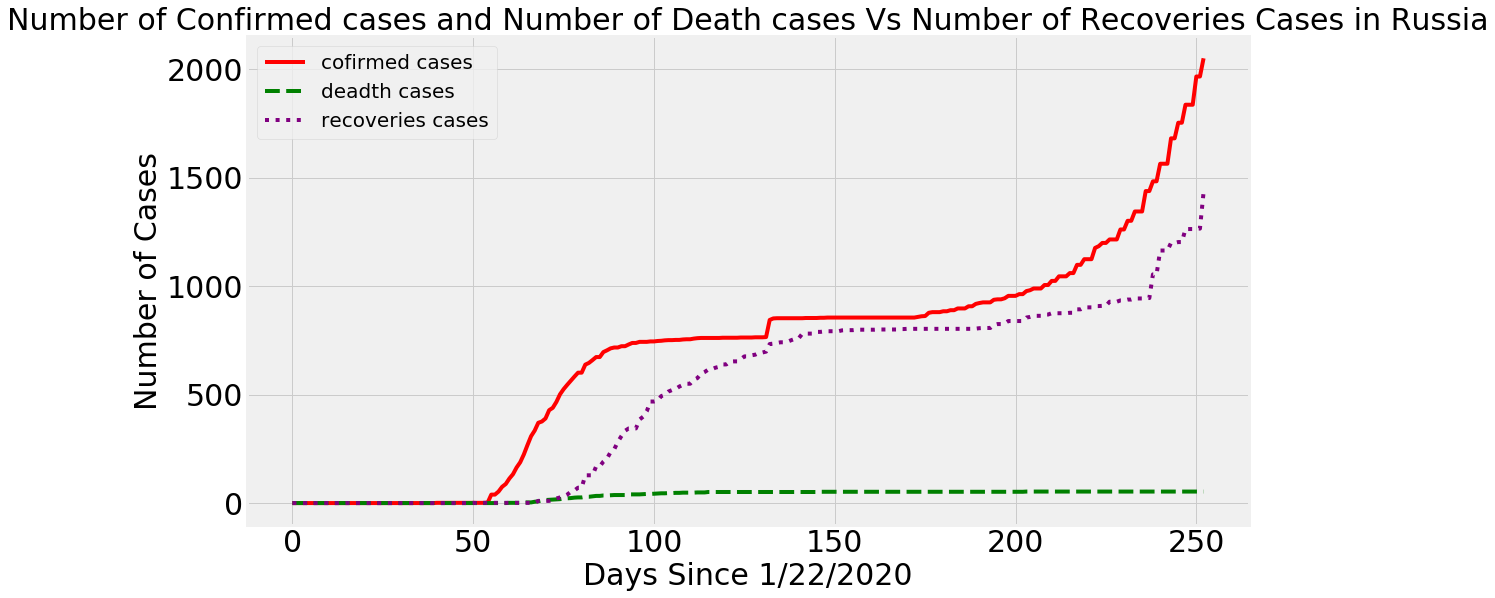

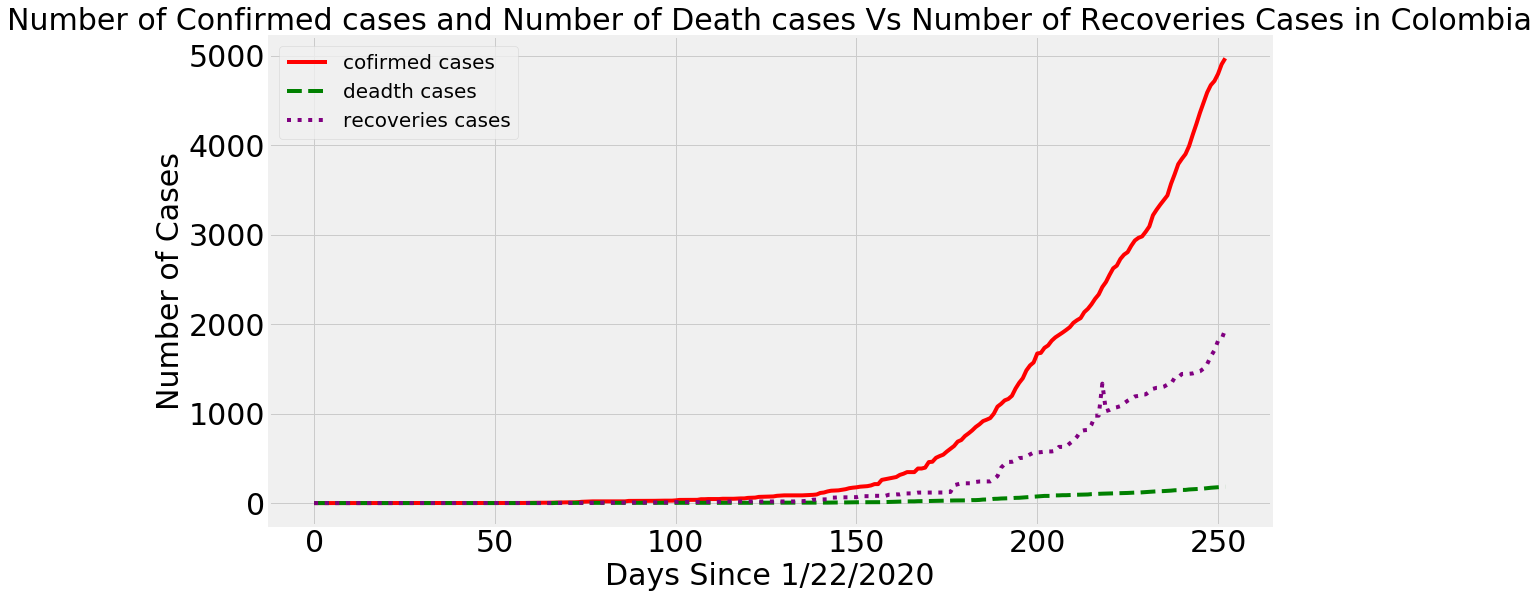

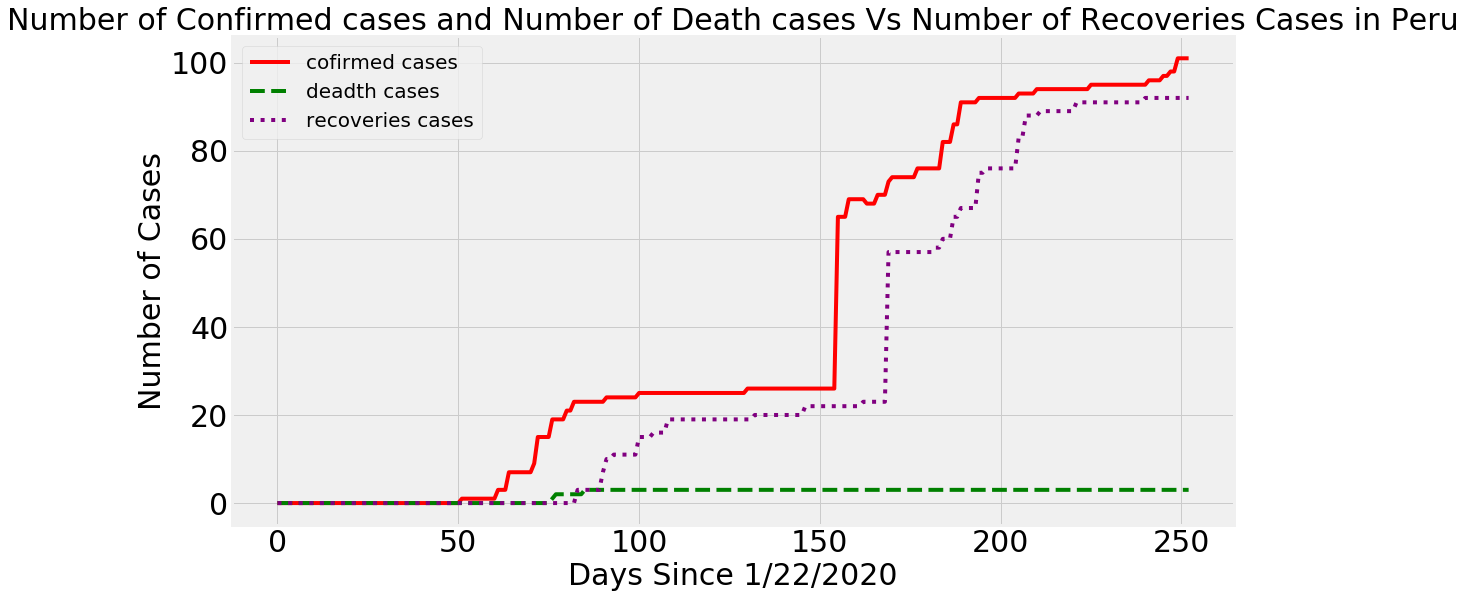

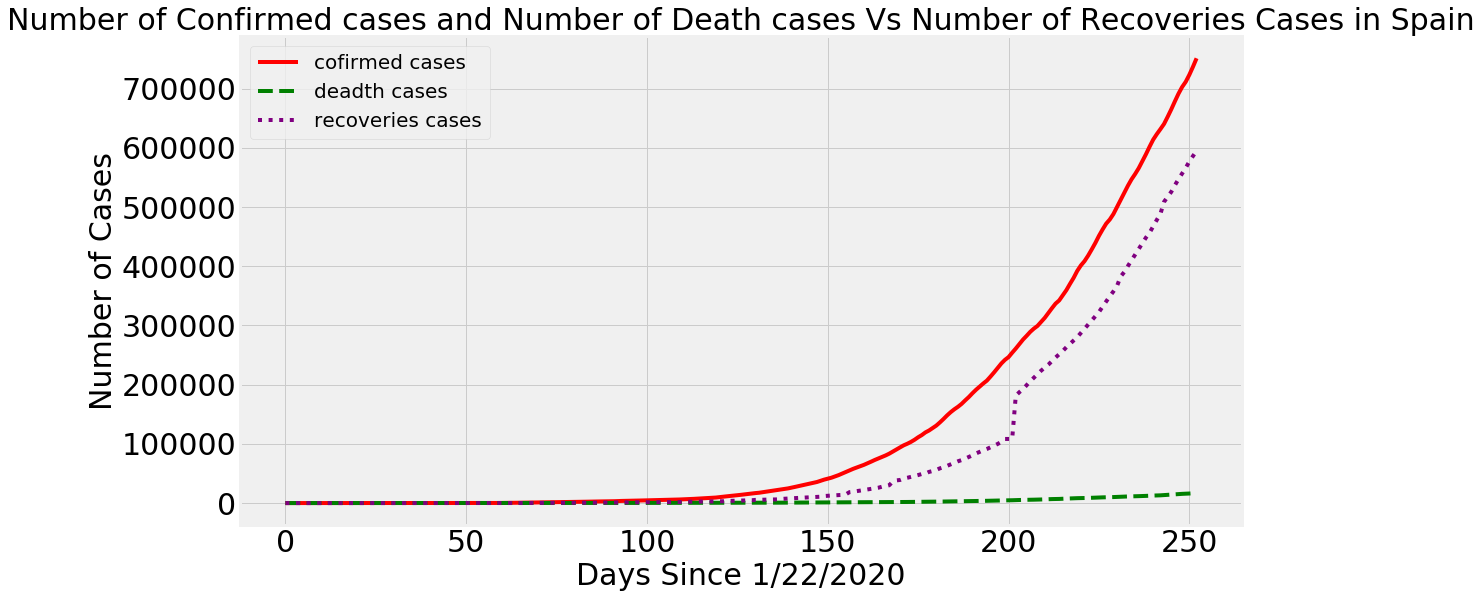

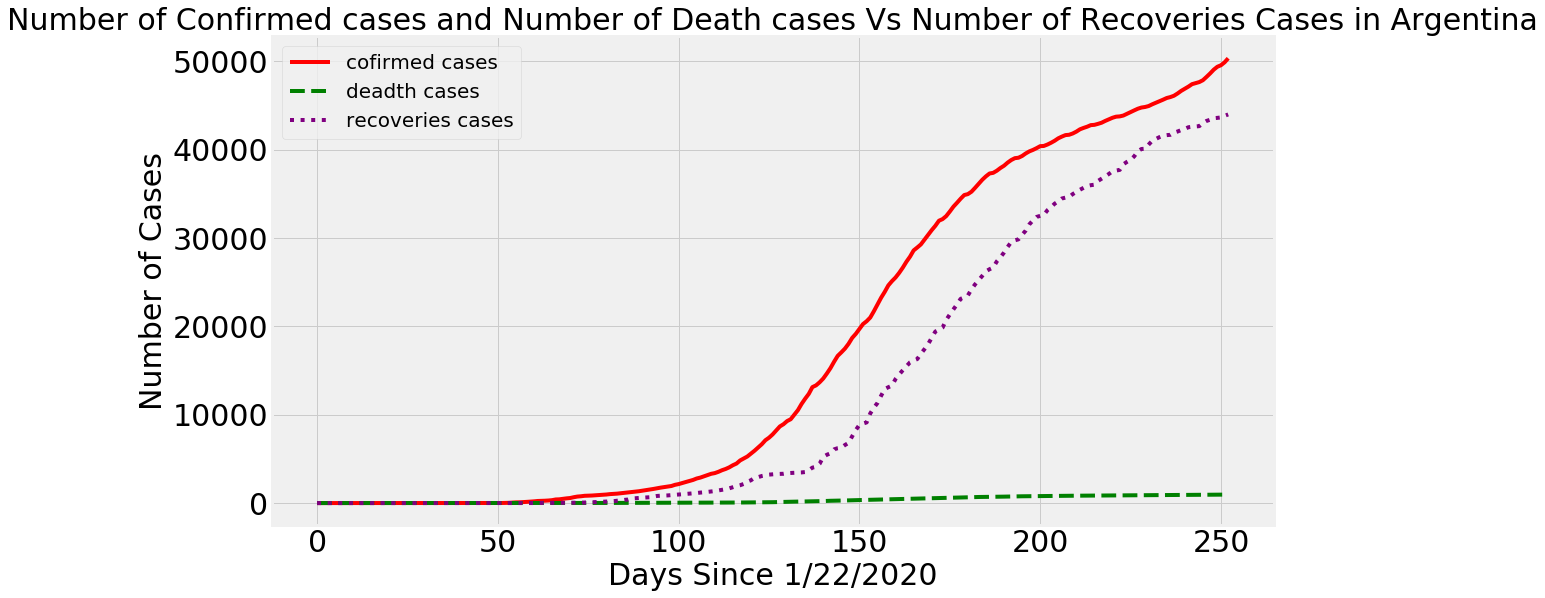

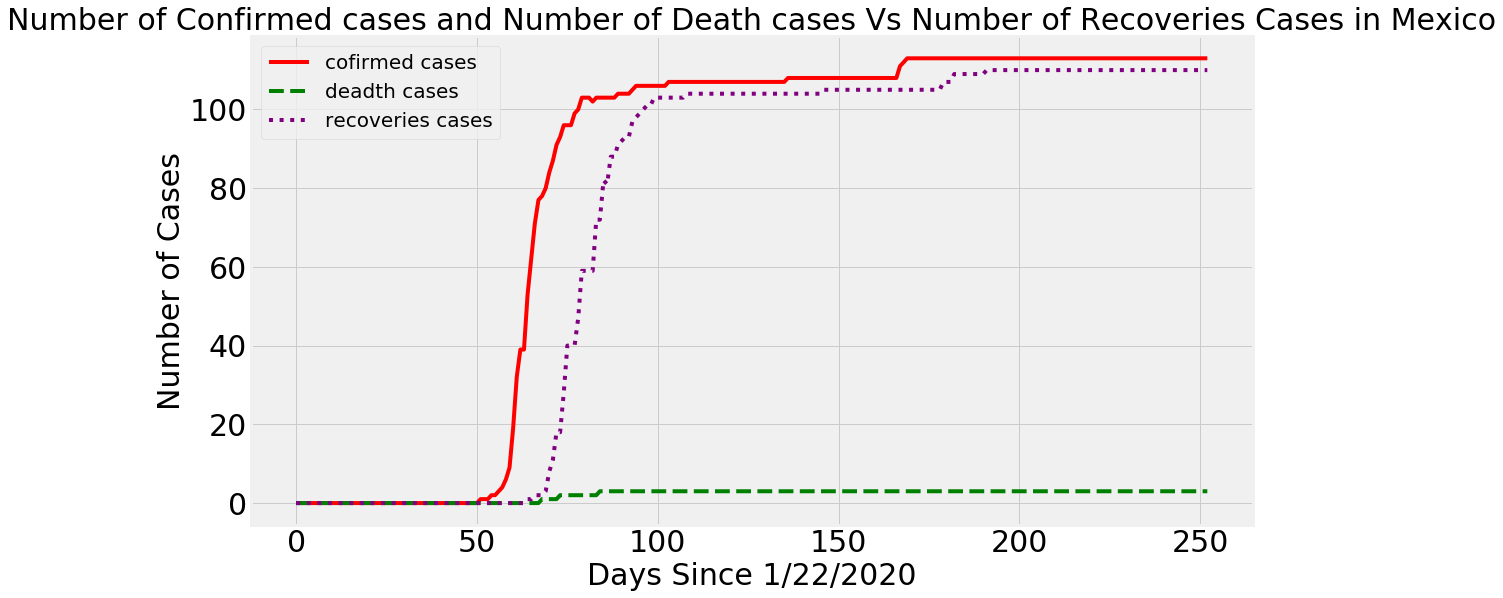

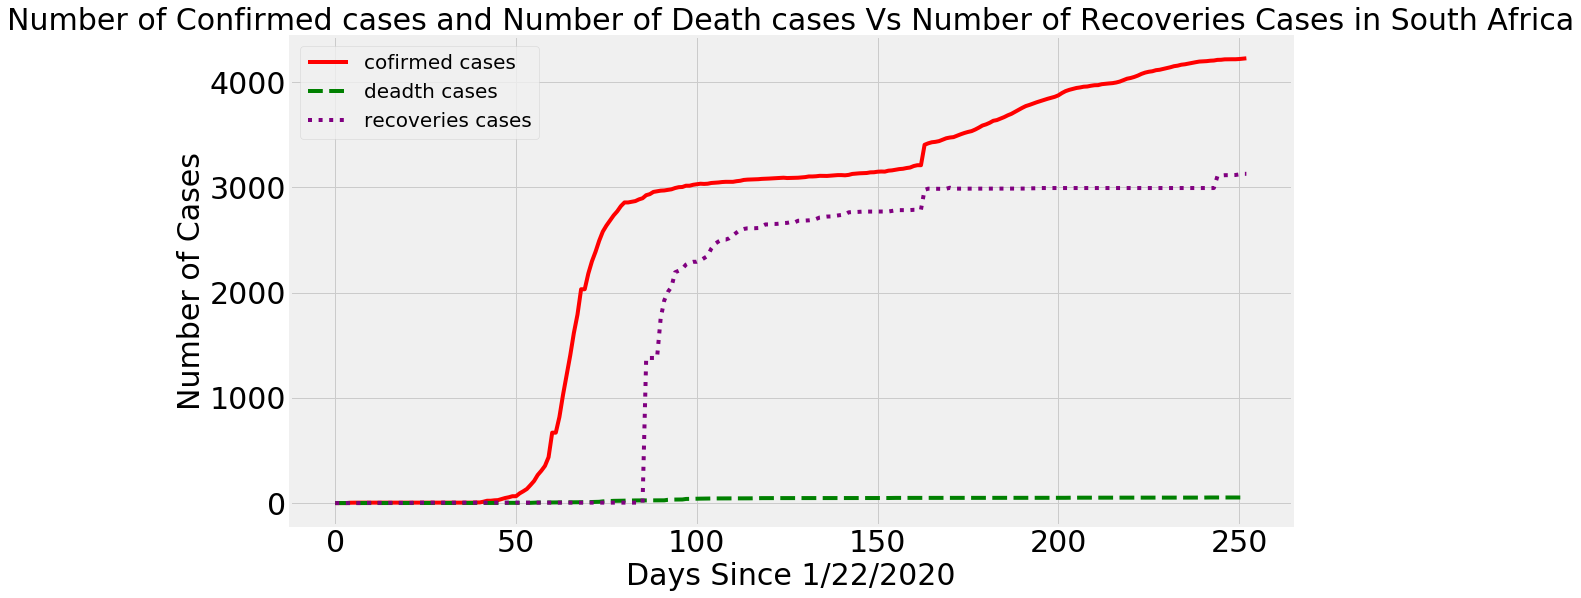

In [100]:
for i in range(len(unique_countries)):
    plt.figure(figsize=(16,9))
    plt.plot(adjusted_dates, confirmed.loc[i],color='r')
    plt.plot(adjusted_dates,deaths.loc[i],linestyle='dashed',color='green')
    plt.plot(adjusted_dates,recoveries.loc[i],linestyle='dotted',color='purple')
    plt.title('Number of Confirmed cases and Number of Death cases Vs Number of Recoveries Cases in {}'.format(unique_countries[i]), size=30)
    plt.legend(['cofirmed cases','deadth cases','recoveries cases'],loc='best',fontsize=20)
    plt.xlabel('Days Since 1/22/2020', size=30)
    plt.ylabel('Number of Cases', size=30)
    plt.xticks(size=30)
    plt.yticks(size=30)
    plt.show()
